TASK 1: Preparing the Tesco dataset

In [2]:
#Importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import geopandas as gpd
import numpy as np
import plotly.graph_objects as go

In [3]:
#Combining all datasets including the yearly counts
relative_path = r'/Users/kajolpawar/Documents/SEM2/ADS/CW'
path = relative_path + '/'+'tesco_purchases_dataset'
files = os.listdir(path)
#print(files)
df = pd.DataFrame()
#print(df_all)

for file in files:
    df_temp = pd.read_csv(path + '/' + file)
    df_temp['Month'] = file.split('_')[0]   #new column added at end of df_temp
    df_temp['Region'] = file.split('_')[1] #new column added at the end of df_temp after column Month
    df = pd.concat([df, df_temp])
df

area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0   E09000001  323.174750            35.0          150.0          250.0   
1   E09000002  421.304125            32.5          165.6          300.0   
2   E09000003  407.170491            40.0          180.0          320.0   
3   E09000004  359.544126            30.0          144.0          255.0   
4   E09000005  434.324141            40.0          175.0          325.0   
..        ...         ...             ...            ...            ...   
28  E09000029  306.087134            30.0          120.0          220.0   
29  E09000030  399.978802            38.0          160.0          300.0   
30  E09000031  420.911587            40.0          180.0          325.0   
31  E09000032  357.509164            34.0          150.0          270.0   
32  E09000033  382.109688            40.0          165.0          300.0   

    weight_perc75  weight_perc97.5  weight_std  weight_ci95      volume  ...  \
0           400.0           1000.0  323.692596     1.001520   98.842963  ...   
1           500.0           1500.0  597.994271     0.828993  122.341294  ...   
2           500.0           1160.0  443.644324     0.171615  114.933771  ...   
3           450.0           1000.0  476.576945     0.819748  106.446426  ...   
4           500.0           1500.0  616.087316     0.354492  128.930369  ...   
..            ...              ...         ...          ...         ...  ...   
28          400.0           1000.0  395.792084     3.707527  102.326321  ...   
29          500.0           1100.0  526.152117     0.995052  116.806064  ...   
30          500.0           1400.0  522.131211     0.781439  119.986702  ...   
31          454.0           1000.0  396.767398     1.165369  107.074123  ...   
32          500.0           1000.0  434.413415     1.163917  109.418845  ...   

        male    female  age_0_17  age_18_64  age_65+    avg_age  area_sq_km  \
0     3697.0    2990.0    1018.0     4349.0   1320.0  43.910124        2.90   
1    99442.0  103659.0   60281.0   123180.0  19640.0  33.017321       36.09   
2   186357.0  192421.0   88754.0   237036.0  52988.0  37.195582       86.76   
3   116814.0  125573.0   56028.0   146237.0  40122.0  38.880749       60.58   
4   163939.0  159504.0   75033.0   211885.0  36525.0  35.766416       43.28   
..       ...       ...       ...        ...      ...        ...         ...   
28   97427.0  102443.0   46142.0   123600.0  30128.0  38.449162       43.80   
29  152762.0  141066.0   64797.0   211354.0  17677.0  31.514726       19.75   
30  135651.0  135020.0   65030.0   177768.0  27873.0  34.990623       38.86   
31  154118.0  165359.0   61036.0   229044.0  29397.0  34.811996       34.25   
32  123356.0  114691.0   42610.0   167188.0  28249.0  37.157952       21.50   

    people_per_sq_km  Month   Region  
0        2305.862069   year  borough  
1        5627.625381   year  borough  
2        4365.813739   year  borough  
3        4001.105976   year  borough  
4        7473.267098   year  borough  
..               ...    ...      ...  
28       4563.242009    Nov  borough  
29      14877.367089    Nov  borough  
30       6965.285641    Nov  borough  
31       9327.795620    Nov  borough  
32      11071.953488    Nov  borough  

[77577 rows x 204 columns]

In [4]:
print(df.columns.tolist())

['area_id', 'weight', 'weight_perc2.5', 'weight_perc25', 'weight_perc50', 'weight_perc75', 'weight_perc97.5', 'weight_std', 'weight_ci95', 'volume', 'volume_perc2.5', 'volume_perc25', 'volume_perc50', 'volume_perc75', 'volume_perc97.5', 'volume_std', 'volume_ci95', 'fat', 'fat_perc2.5', 'fat_perc25', 'fat_perc50', 'fat_perc75', 'fat_perc97.5', 'fat_std', 'fat_ci95', 'saturate', 'saturate_perc2.5', 'saturate_perc25', 'saturate_perc50', 'saturate_perc75', 'saturate_perc97.5', 'saturate_std', 'saturate_ci95', 'salt', 'salt_perc2.5', 'salt_perc25', 'salt_perc50', 'salt_perc75', 'salt_perc97.5', 'salt_std', 'salt_ci95', 'sugar', 'sugar_perc2.5', 'sugar_perc25', 'sugar_perc50', 'sugar_perc75', 'sugar_perc97.5', 'sugar_std', 'sugar_ci95', 'protein', 'protein_perc2.5', 'protein_perc25', 'protein_perc50', 'protein_perc75', 'protein_perc97.5', 'protein_std', 'protein_ci95', 'carb', 'carb_perc2.5', 'carb_perc25', 'carb_perc50', 'carb_perc75', 'carb_perc97.5', 'carb_std', 'carb_ci95', 'fibre', 'fi

In [5]:

# Filter dataset to include only 'Borough' regions
df_borough = df[df["Region"] == "borough"].copy()

#print(df_borough)
#It also contains yearly data

#Separate the monthly and yearly data for boroughs
df_borough_monthly = df_borough[df_borough["Month"] != "year"].copy()
df_borough_yearly = df_borough[df_borough["Month"] == "year"].copy()


In [6]:
df_borough_yearly

area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0   E09000001  323.174750            35.0          150.0          250.0   
1   E09000002  421.304125            32.5          165.6          300.0   
2   E09000003  407.170491            40.0          180.0          320.0   
3   E09000004  359.544126            30.0          144.0          255.0   
4   E09000005  434.324141            40.0          175.0          325.0   
5   E09000006  319.336273            30.0          135.0          250.0   
6   E09000007  348.420414            35.0          150.0          260.0   
7   E09000008  353.636123            30.0          150.0          250.0   
8   E09000009  358.569245            35.0          154.0          275.0   
9   E09000010  416.062456            40.0          180.0          325.0   
10  E09000011  403.189686            37.5          170.0          305.0   
11  E09000012  405.993196            40.0          175.0          308.0   
12  E09000013  368.873372            40.0          166.4          300.0   
13  E09000014  401.729619            40.0          175.0          314.0   
14  E09000015  427.891938            40.0          180.0          325.0   
15  E09000016  319.155687            29.0          125.0          239.2   
16  E09000017  374.737951            36.0          165.0          300.0   
17  E09000018  336.922944            32.5          150.0          250.0   
18  E09000019  357.452740            35.0          155.0          290.0   
19  E09000020  372.608765            40.0          170.0          300.0   
20  E09000021  297.379174            30.0          125.0          220.0   
21  E09000022  397.096905            40.0          174.0          300.0   
22  E09000023  399.181910            38.0          170.0          302.0   
23  E09000024  336.747006            32.0          150.0          250.0   
24  E09000025  450.349903            39.0          175.0          325.0   
25  E09000026  407.369285            37.0          170.0          300.0   
26  E09000027  321.808045            32.5          150.0          250.0   
27  E09000028  387.681320            40.0          175.0          300.0   
28  E09000029  295.330271            28.0          120.0          215.0   
29  E09000030  390.047012            37.5          160.0          300.0   
30  E09000031  414.805726            40.0          180.0          320.0   
31  E09000032  350.286873            35.0          150.0          268.0   
32  E09000033  380.470120            40.0          165.0          300.0   

    weight_perc75  weight_perc97.5  weight_std  weight_ci95      volume  ...  \
0           400.0           1000.0  323.692596     1.001520   98.842963  ...   
1           500.0           1500.0  597.994271     0.828993  122.341294  ...   
2           500.0           1160.0  443.644324     0.171615  114.933771  ...   
3           450.0           1000.0  476.576945     0.819748  106.446426  ...   
4           500.0           1500.0  616.087316     0.354492  128.930369  ...   
5           400.0           1000.0  347.979651     0.458224  101.105159  ...   
6           450.0           1000.0  370.640809     0.373270  102.525979  ...   
7           450.0           1000.0  425.267620     0.487412  107.461977  ...   
8           454.0           1000.0  373.797449     0.271506  106.197369  ...   
9           500.0           1500.0  456.120381     0.187516  122.353062  ...   
10          500.0           1200.0  498.743168     0.323224  114.736225  ...   
11          500.0           1160.0  486.498044     0.296792  111.593823  ...   
12          485.0           1000.0  355.888762     0.223326  102.882176  ...   
13          500.0           1100.0  430.122088     0.239607  111.394666  ...   
14          500.0           1400.0  581.035689     0.307016  133.105977  ...   
15          400.0           1000.0  390.140389     0.683918   99.909387  ...   
16          500.0           1000.0  394.154178     0.310364  119.792570  ...   
17          450

In [7]:

#print(df_borough_monthly["Month"].unique()) 

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df_borough_monthly["Month"] = df_borough_monthly["Month"].str.strip()

df_borough_monthly["Month"] = pd.Categorical(df_borough_monthly["Month"], categories=month_order, ordered=True)

df_borough_monthly = df_borough_monthly.sort_values(by=["Month","area_id"],ascending=[True, True])

df_borough_monthly
#df_borough_monthly["Month"].unique()


area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0   E09000001  330.866887            32.5          150.0          260.0   
1   E09000002  415.302544            32.5          170.0          320.0   
2   E09000003  409.869545            39.0          180.0          330.0   
3   E09000004  364.805547            30.0          150.0          290.0   
4   E09000005  426.646722            35.0          175.0          335.0   
..        ...         ...             ...            ...            ...   
28  E09000029  318.592094            30.0          125.0          227.0   
29  E09000030  416.380488            40.0          170.0          300.0   
30  E09000031  434.528453            42.0          190.0          325.0   
31  E09000032  376.886546            39.0          157.6          280.0   
32  E09000033  400.183079            40.0          173.0          300.0   

    weight_perc75  weight_perc97.5  weight_std  weight_ci95      volume  ...  \
0           440.0           1000.0  342.577936     3.607936  104.009275  ...   
1           500.0           1500.0  517.414980     2.451022  127.208198  ...   
2           500.0           1100.0  416.632903     0.549487  119.839131  ...   
3           480.0           1000.0  423.930671     2.409420  112.313670  ...   
4           500.0           1500.0  538.379912     1.062093  134.025334  ...   
..            ...              ...         ...          ...         ...  ...   
28          400.0           1000.0  382.710891     3.614588  104.883033  ...   
29          500.0           1500.0  505.140994     0.932993  117.950244  ...   
30          500.0           1500.0  522.080691     0.742776  119.112970  ...   
31          480.0           1000.0  430.492026     1.277555  107.855843  ...   
32          500.0           1200.0  435.308404     1.149294  110.715397  ...   

        male    female  age_0_17  age_18_64  age_65+    avg_age  area_sq_km  \
0     3697.0    2990.0    1018.0     4349.0   1320.0  43.910124        2.90   
1    99442.0  103659.0   60281.0   123180.0  19640.0  33.017321       36.09   
2   186357.0  192421.0   88754.0   237036.0  52988.0  37.195582       86.76   
3   116814.0  125573.0   56028.0   146237.0  40122.0  38.880749       60.58   
4   163939.0  159504.0   75033.0   211885.0  36525.0  35.766416       43.28   
..       ...       ...       ...        ...      ...        ...         ...   
28   97427.0  102443.0   46142.0   123600.0  30128.0  38.449162       43.80   
29  152762.0  141066.0   64797.0   211354.0  17677.0  31.514726       19.75   
30  135651.0  135020.0   65030.0   177768.0  27873.0  34.990623       38.86   
31  154118.0  165359.0   61036.0   229044.0  29397.0  34.811996       34.25   
32  123356.0  114691.0   42610.0   167188.0  28249.0  37.157952       21.50   

    people_per_sq_km  Month   Region  
0        2305.862069    Jan  borough  
1        5627.625381    Jan  borough  
2        4365.813739    Jan  borough  
3        4001.105976    Jan  borough  
4        7473.267098    Jan  borough  
..               ...    ...      ...  
28       4563.242009    Dec  borough  
29      14877.367089    Dec  borough  
30       6965.285641    Dec  borough  
31       9327.795620    Dec  borough  
32      11071.953488    Dec  borough  

[396 rows x 204 columns]

TASK 2

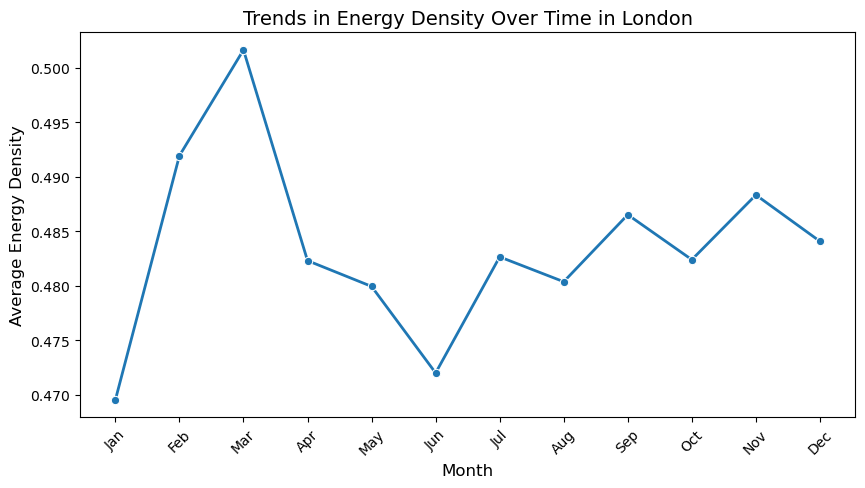

In [9]:
# Group by month and calculate the mean energy density
monthly_trend = df_borough_monthly.groupby("Month", observed=True)["energy_density"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x="Month", y="energy_density", marker="o", linewidth=2)

# Formatting
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Energy Density", fontsize=12)
plt.title("Trends in Energy Density Over Time in London", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show plot
plt.show()


Higher energy density in early months could be linked to winter dietary habits (higher calorie intake).
Drop in mid-year may indicate lighter food choices in summer.
Certain food categories might be more consumed in different months, impacting energy density changes, after mid-year.

In [11]:

# Ensure 'Month' is categorical and ordered correctly
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_borough_monthly['Month'] = pd.Categorical(df_borough_monthly['Month'], categories=month_order, ordered=True)
df_borough_monthly


area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0   E09000001  330.866887            32.5          150.0          260.0   
1   E09000002  415.302544            32.5          170.0          320.0   
2   E09000003  409.869545            39.0          180.0          330.0   
3   E09000004  364.805547            30.0          150.0          290.0   
4   E09000005  426.646722            35.0          175.0          335.0   
..        ...         ...             ...            ...            ...   
28  E09000029  318.592094            30.0          125.0          227.0   
29  E09000030  416.380488            40.0          170.0          300.0   
30  E09000031  434.528453            42.0          190.0          325.0   
31  E09000032  376.886546            39.0          157.6          280.0   
32  E09000033  400.183079            40.0          173.0          300.0   

    weight_perc75  weight_perc97.5  weight_std  weight_ci95      volume  ...  \
0           440.0           1000.0  342.577936     3.607936  104.009275  ...   
1           500.0           1500.0  517.414980     2.451022  127.208198  ...   
2           500.0           1100.0  416.632903     0.549487  119.839131  ...   
3           480.0           1000.0  423.930671     2.409420  112.313670  ...   
4           500.0           1500.0  538.379912     1.062093  134.025334  ...   
..            ...              ...         ...          ...         ...  ...   
28          400.0           1000.0  382.710891     3.614588  104.883033  ...   
29          500.0           1500.0  505.140994     0.932993  117.950244  ...   
30          500.0           1500.0  522.080691     0.742776  119.112970  ...   
31          480.0           1000.0  430.492026     1.277555  107.855843  ...   
32          500.0           1200.0  435.308404     1.149294  110.715397  ...   

        male    female  age_0_17  age_18_64  age_65+    avg_age  area_sq_km  \
0     3697.0    2990.0    1018.0     4349.0   1320.0  43.910124        2.90   
1    99442.0  103659.0   60281.0   123180.0  19640.0  33.017321       36.09   
2   186357.0  192421.0   88754.0   237036.0  52988.0  37.195582       86.76   
3   116814.0  125573.0   56028.0   146237.0  40122.0  38.880749       60.58   
4   163939.0  159504.0   75033.0   211885.0  36525.0  35.766416       43.28   
..       ...       ...       ...        ...      ...        ...         ...   
28   97427.0  102443.0   46142.0   123600.0  30128.0  38.449162       43.80   
29  152762.0  141066.0   64797.0   211354.0  17677.0  31.514726       19.75   
30  135651.0  135020.0   65030.0   177768.0  27873.0  34.990623       38.86   
31  154118.0  165359.0   61036.0   229044.0  29397.0  34.811996       34.25   
32  123356.0  114691.0   42610.0   167188.0  28249.0  37.157952       21.50   

    people_per_sq_km  Month   Region  
0        2305.862069    Jan  borough  
1        5627.625381    Jan  borough  
2        4365.813739    Jan  borough  
3        4001.105976    Jan  borough  
4        7473.267098    Jan  borough  
..               ...    ...      ...  
28       4563.242009    Dec  borough  
29      14877.367089    Dec  borough  
30       6965.285641    Dec  borough  
31       9327.795620    Dec  borough  
32      11071.953488    Dec  borough  

[396 rows x 204 columns]

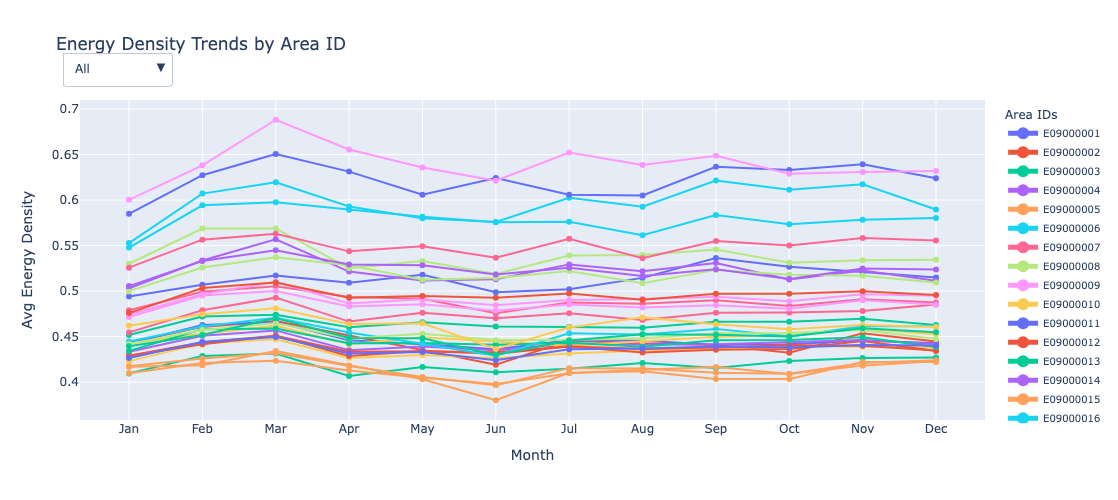

In [12]:
# Sort area IDs in ascending order
area_ids = sorted(df_borough_monthly['area_id'].unique())  

# Create a figure with multiple traces (one per area_id)
fig = go.Figure()

# Add a separate trace for each area_id
for area in area_ids:
    df_subset = df_borough_monthly[df_borough_monthly['area_id'] == area]
    fig.add_trace(go.Scatter(
        x=df_subset['Month'],
        y=df_subset['energy_density'],
        mode='lines+markers',
        name=str(area),
        visible=True  # Default: Show all traces
    ))

# Dropdown options
dropdown_options = [
    {
        "label": "All",
        "method": "update",
        "args": [{"visible": [True] * len(area_ids)}]  # Show all traces
    }
]

# Add options for each area_id in ascending order
for i, area in enumerate(area_ids):
    visibility_array = [False] * len(area_ids)  # Hide all traces
    visibility_array[i] = True  # Show only selected trace

    dropdown_options.append({
        "label": str(area),
        "method": "update",
        "args": [{"visible": visibility_array}]
    })

# Add the dropdown menu
fig.update_layout(
    updatemenus=[{
        "buttons": dropdown_options,
        "direction": "down",
        "showactive": True,
        "x": 0.1,
        "y": 1.15
    }]
)
fig.update_layout(
    width=1000,  # Increase the width of the figure
    height=500  # Increase the height of the figure
)

# Set axis labels and title
fig.update_layout(
    title=" Energy Density Trends by Area ID",
    xaxis_title="Month",
    yaxis_title="Avg Energy Density",
    legend_title_text="Area IDs",
    legend=dict(
        yanchor="top",  # Anchor the legend at the top
        y=0.99,  # Position the legend slightly below the top of the plot
        xanchor="left",  # Anchor the legend to the left
        x=1.02,  # Position the legend outside the plot to the right
        itemwidth= 30,  # Adjust the width of legend items
        itemsizing="constant",  # Keep legend item sizes consistent
        font=dict(size=10)
    )
)

# Show the figure
fig.show()

Areas with ids E09000004, E09000021, E09000029, E09000031 shows similar trends, that is, similar ups-and-downs patterns though varying by level of the average energy density

Let me demonstrate it live

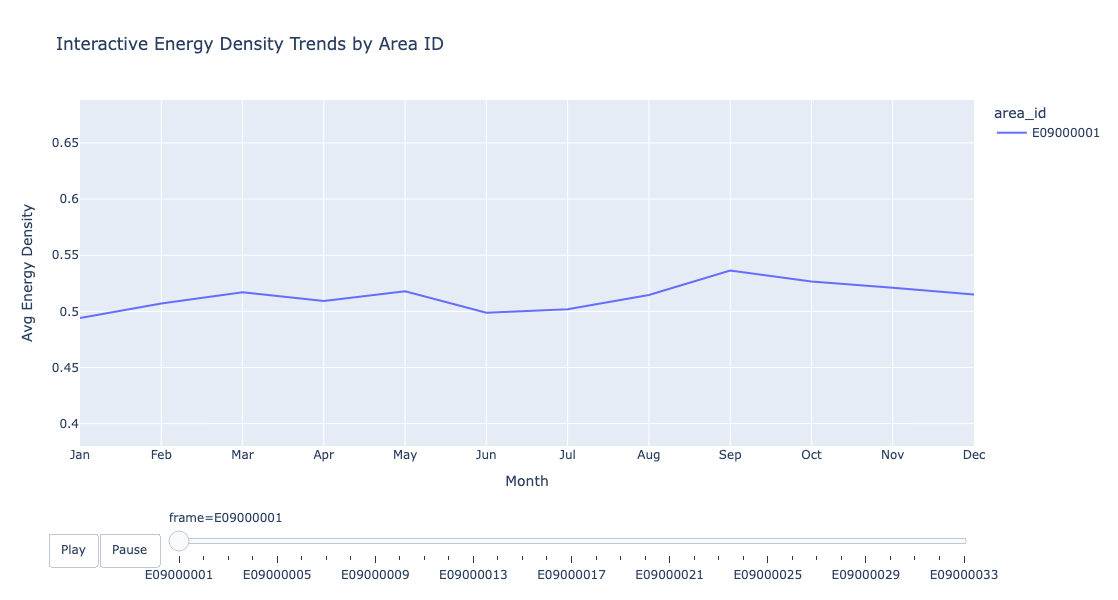

In [15]:
import plotly.express as px
import pandas as pd


# Add a new column 'frame' to represent the animation frame
df_borough_monthly['frame'] = df_borough_monthly['area_id']

# Create the animated plot
fig = px.line(
    df_borough_monthly,
    x='Month',
    y='energy_density',
    color='area_id',
    animation_frame='frame',  # Use 'frame' for animation
    title="Interactive Energy Density Trends by Area ID",
    labels={'energy_density': 'Avg Energy Density', 'Month': 'Month'},
    range_y=[df_borough_monthly['energy_density'].min(), df_borough_monthly['energy_density'].max()]  # Fix y-axis range
)

# Customize the animation
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Avg Energy Density",
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 300, "redraw": True}, "fromcurrent": True}],
                "label": "Play",
                "method": "animate",
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate",
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top",
    }],
    # Set the figure size
    width=1000,  # Width of the figure in pixels
    height=600   # Height of the figure in pixels
)

# Show the figure
fig.show()

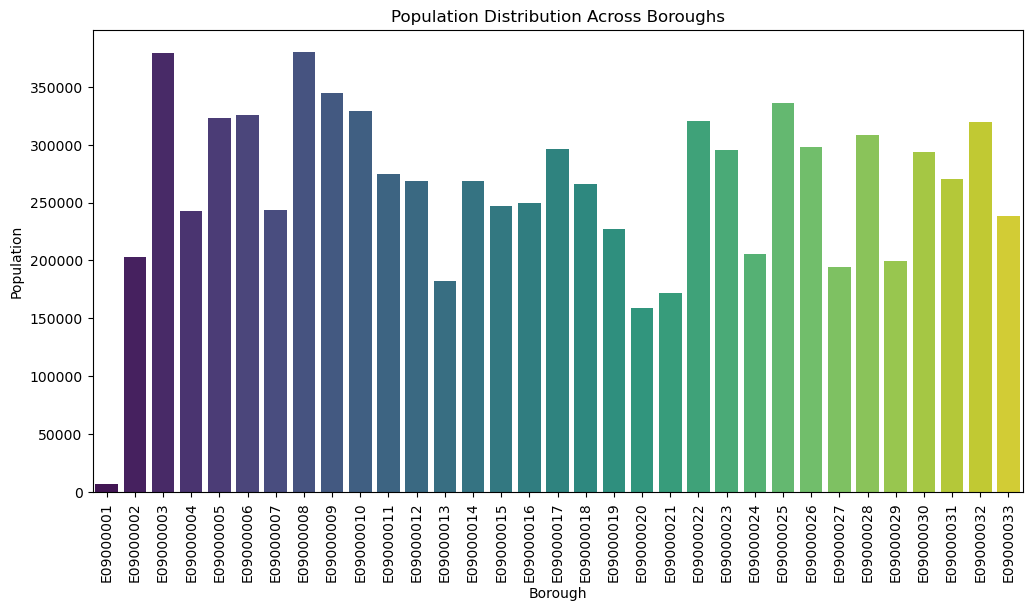

In [16]:
#start with visualisation of population in each boroughs

# Set figure size
plt.figure(figsize=(12,6))

# Create barplot with legend
sns.barplot(data=df_borough_monthly, x="area_id", y="population", hue="area_id", palette="viridis", legend = False)

# Formatting
plt.xticks(rotation=90)
plt.xlabel("Borough")
plt.ylabel("Population")
plt.title("Population Distribution Across Boroughs")


# Show plot
plt.show()


Population varies significantly across boroughs. The distribution is uneven, with certain boroughs having noticeably larger populations than others.


In [18]:
#Compute summary statistics for the borough populations:
df_borough["population"].describe()

count       429.000000
mean     262634.242424
std       72749.818810
min        6687.000000
25%      227507.000000
50%      268626.000000
75%      319477.000000
max      380070.000000
Name: population, dtype: float64

We can observe wide variation in population.
Some boroughs are significantly larger or smaller than others (Greater value of std deviation).
A huge gap between the smallest and largest borough.
The smallest borough (6,687) is way below Q1 (227K), which clearly is "E09000001" from the bar graph.
The largest borough (380K) is far from Q3 (319K). 
Thus, these 2 boroughs maybe outliers here Lets confirm using boxplot

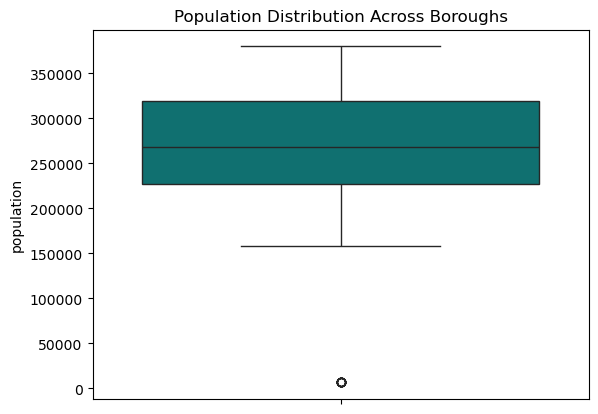

In [20]:
#Visualize Outliers → Use a boxplot to check boroughs with extreme populations:
sns.boxplot(y=df_borough["population"], color="teal")  # Use color instead of palette
plt.title("Population Distribution Across Boroughs")
plt.show()

We can confirm that one borough (with min value) has an extremely low population, making it a clear outlier. while the borough with max value is not outlier.

In [22]:
#Using Shape file of LONDON
shp_borough = gpd.read_file('/Users/kajolpawar/Documents/SEM2/ADS/CW/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

# Removing all the unnecesary columns and renaming the usefull columns to match the names in our dataset.
shp_borough = shp_borough[['NAME','GSS_CODE','geometry']]
shp_borough.head()

NAME   GSS_CODE  \
0  Kingston upon Thames  E09000021   
1               Croydon  E09000008   
2               Bromley  E09000006   
3              Hounslow  E09000018   
4                Ealing  E09000009   

                                            geometry  
0  POLYGON ((516401.600 160201.800, 516407.300 16...  
1  POLYGON ((535009.200 159504.700, 535005.500 15...  
2  POLYGON ((540373.600 157530.400, 540361.200 15...  
3  POLYGON ((521975.800 178100.000, 521967.700 17...  
4  POLYGON ((510253.500 182881.600, 510249.900 18...

In [23]:
# Merging our original dataset with our shapefiles data
map_data = pd.merge(shp_borough,df_borough_yearly,left_on = 'GSS_CODE', right_on= 'area_id',how= 'right', indicator = True)
map_data['centroid'] = map_data.centroid

# Dropping the missing values
index = map_data[map_data['NAME'].isnull()].index
map_data = map_data.drop(index,axis = 0)

# Drop the duplicate column (keep only 'GSS_CODE')
map_data = map_data.drop(columns=["GSS_CODE"])

# Final Data
map_data.head()

NAME                                           geometry  \
0        City of London  POLYGON ((531145.100 180782.100, 531143.800 18...   
1  Barking and Dagenham  MULTIPOLYGON (((543905.400 183199.100, 543905....   
2                Barnet  POLYGON ((524579.900 198355.200, 524594.300 19...   
3                Bexley  POLYGON ((547226.200 181299.300, 547320.900 18...   
4                 Brent  POLYGON ((525201.000 182512.600, 525181.500 18...   

     area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0  E09000001  323.174750            35.0          150.0          250.0   
1  E09000002  421.304125            32.5          165.6          300.0   
2  E09000003  407.170491            40.0          180.0          320.0   
3  E09000004  359.544126            30.0          144.0          255.0   
4  E09000005  434.324141            40.0          175.0          325.0   

   weight_perc75  weight_perc97.5  weight_std  ...  age_0_17  age_18_64  \
0          400.0           1000.0  323.692596  ...    1018.0     4349.0   
1          500.0           1500.0  597.994271  ...   60281.0   123180.0   
2          500.0           1160.0  443.644324  ...   88754.0   237036.0   
3          450.0           1000.0  476.576945  ...   56028.0   146237.0   
4          500.0           1500.0  616.087316  ...   75033.0   211885.0   

   age_65+    avg_age  area_sq_km  people_per_sq_km  Month   Region  _merge  \
0   1320.0  43.910124        2.90       2305.862069   year  borough    both   
1  19640.0  33.017321       36.09       5627.625381   year  borough    both   
2  52988.0  37.195582       86.76       4365.813739   year  borough    both   
3  40122.0  38.880749       60.58       4001.105976   year  borough    both   
4  36525.0  35.766416       43.28       7473.267098   year  borough    both   

                        centroid  
0  POINT (532479.634 181271.833)  
1  POINT (548040.122 185087.790)  
2  POINT (524027.595 192316.340)  
3  POINT (548794.417 175487.156)  
4  POINT (520177.868 185829.516)  

[5 rows x 208 columns]

In [24]:
map_data = map_data[['NAME','area_id','geometry','weight','volume','fat','saturate','salt','sugar','protein','carb','fibre','alcohol','f_beer','f_dairy','f_eggs','f_fats_oils','f_fish','f_fruit_veg','f_grains','f_meat_red','f_poultry','f_readymade','f_sauces','f_soft_drinks','f_spirits','f_sweets','f_tea_coffee','f_water','f_wine','representativeness_norm','transaction_days','num_transactions','man_day','population','male','female','age_0_17','age_18_64','age_65+','avg_age','area_sq_km','people_per_sq_km','Month','Region','centroid']]
map_data = map_data.rename({'NAME': 'name','num_transactions':'num_products','man_day':'customer_visits','representativeness_norm':'unique_cust_norm','Month':'month','Region':'region'}, axis = 'columns')
map_data


name    area_id  \
0           City of London  E09000001   
1     Barking and Dagenham  E09000002   
2                   Barnet  E09000003   
3                   Bexley  E09000004   
4                    Brent  E09000005   
5                  Bromley  E09000006   
6                   Camden  E09000007   
7                  Croydon  E09000008   
8                   Ealing  E09000009   
9                  Enfield  E09000010   
10               Greenwich  E09000011   
11                 Hackney  E09000012   
12  Hammersmith and Fulham  E09000013   
13                Haringey  E09000014   
14                  Harrow  E09000015   
15                Havering  E09000016   
16              Hillingdon  E09000017   
17                Hounslow  E09000018   
18               Islington  E09000019   
19  Kensington and Chelsea  E09000020   
20    Kingston upon Thames  E09000021   
21                 Lambeth  E09000022   
22                Lewisham  E09000023   
23                  Merton  E09000024   
24                  Newham  E09000025   
25               Redbridge  E09000026   
26    Richmond upon Thames  E09000027   
27               Southwark  E09000028   
28                  Sutton  E09000029   
29           Tower Hamlets  E09000030   
30          Waltham Forest  E09000031   
31              Wandsworth  E09000032   
32             Westminster  E09000033   

                                             geometry      weight      volume  \
0   POLYGON ((531145.100 180782.100, 531143.800 18...  323.174750   98.842963   
1   MULTIPOLYGON (((543905.400 183199.100, 543905....  421.304125  122.341294   
2   POLYGON ((524579.900 198355.200, 524594.300 19...  407.170491  114.933771   
3   POLYGON ((547226.200 181299.300, 547320.900 18...  359.544126  106.446426   
4   POLYGON ((525201.000 182512.600, 525181.500 18...  434.324141  128.930369   
5   POLYGON ((540373.600 157530.400, 540361.200 15...  319.336273  101.105159   
6   POLYGON ((528840.200 187217.800, 528834.600 18...  348.420414  102.525979   
7   POLYGON ((535009.200 159504.700, 535005.500 15...  353.636123  107.461977   
8   POLYGON ((510253.500 182881.600, 510249.900 18...  358.569245  106.197369   
9   POLYGON ((531023.500 200933.600, 531039.900 20...  416.062456  122.353062   
10  MULTIPOLYGON (((537238.700 178137.700, 537242....  403.189686  114.736225   
11  POLYGON ((531928.400 187801.500, 531935.700 18...  405.993196  111.593823   
12  POLYGON ((521975.800 178100.000, 521973.000 17...  368.873372  102.882176   
13  POLYGON ((531928.400 187801.500, 531919.200 18...  401.729619  111.394666   
14  POLYGON ((510599.800 191689.500, 510660.000 19...  427.891938  133.105977   
15  POLYGON ((549893.900 181459.800, 549894.600 18...  319.155687   99.909387   
16  POLYGON ((510599.800 191689.500, 510615.200 19...  374.737951  119.792570   
17  POLYGON ((521975.800 178100.000, 521967.700 17...  336.922944  105.201811   
18  POLYGON ((529153.600 185861.400, 529144.800 18...  357.452740  104.540991   
19  POLYGON ((526219.700 176948.000, 526208.800 17...  372.608765  100.566629   
20  POLYGON ((516401.600 160201.800, 516407.300 16...  297.379174   95.006632   
21  POLYGON ((530046.800 177893.400, 530048.400 17...  397.096905  103.518902   
22  POLYGON ((536691.000 178958.600, 536691.900 17...  399.181910  105.628372   
23  POLYGON ((529906.200 167417.300, 529902.200 16...  336.747006  103.753813   
24  MULTIPOLYGON (((544065.000 183254.100, 544062....  450.349903  136.703561   
25  POLYGON ((543595.500 184832.800, 543577.100 18...  407.369285  119.013556   
26  POLYGON ((516677.500 175383.800, 516678.600 17...  321.808045   97.373183   
27  POLYGON ((531335.600 180529.500, 531337.700 18...  387.681320  107.157266   
28  POLYGON ((528552.300 159658.100, 528399.700 15...  295.330271   98.495864   
29  POLYGON ((533387.600 180516.400, 533389.800 18...  390.047012  112.608969   
30  POLYGON ((539923.100 191863.100, 539928.100 19...  414.805726  117.975457   
31  POLYGON ((523489.600 176224.800

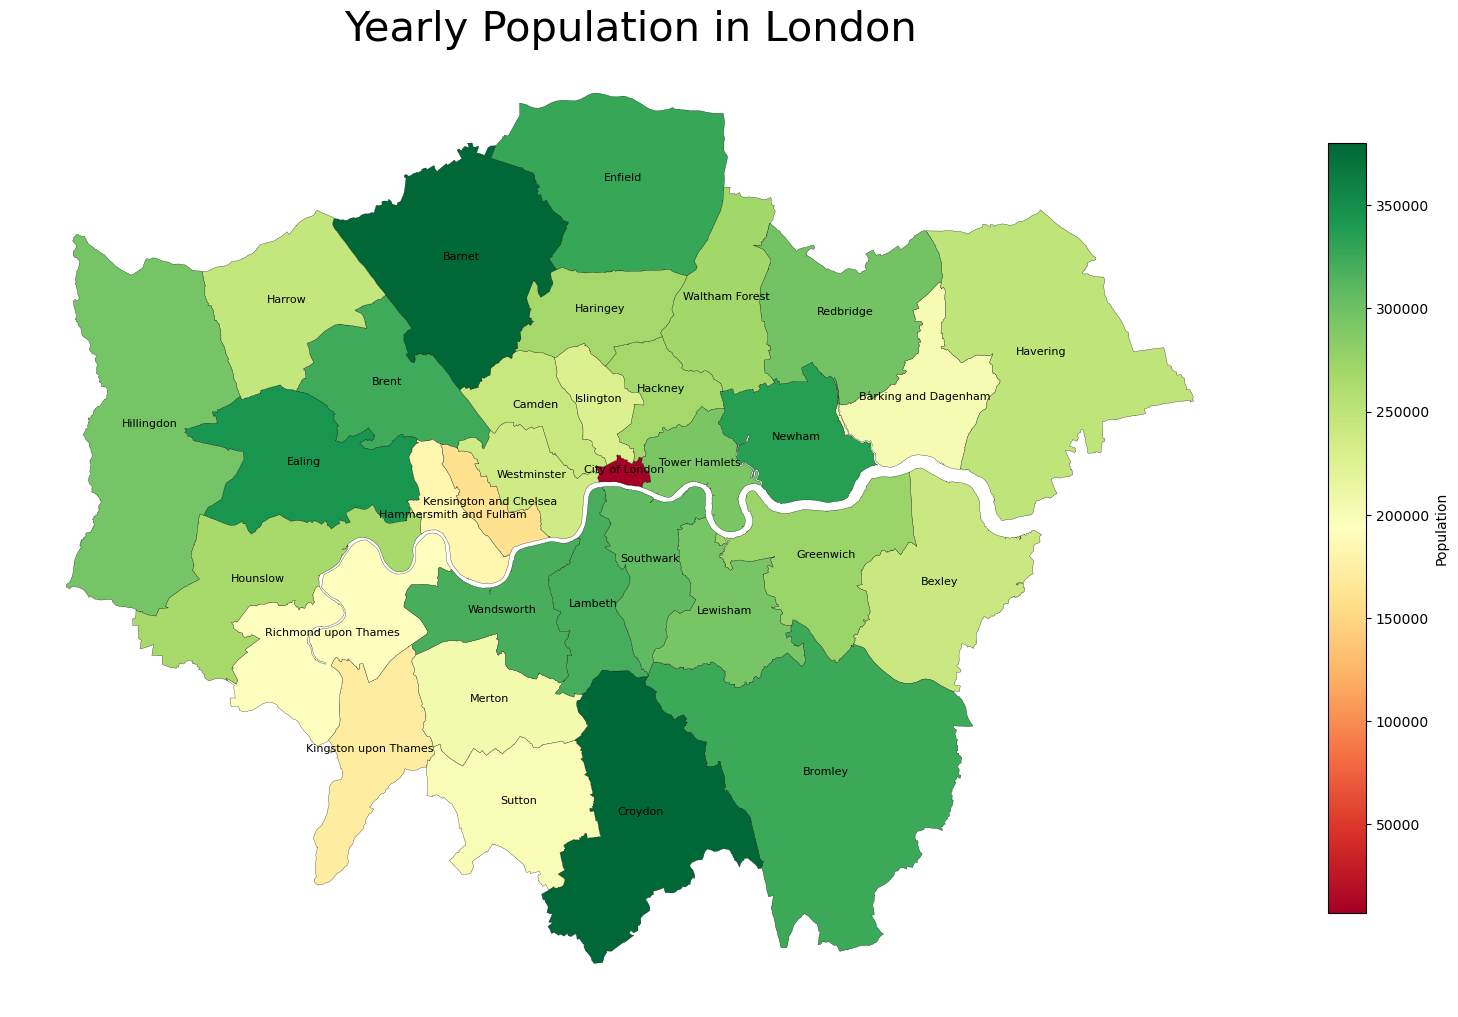

In [25]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Aggregate population to yearly values per borough
data_yearly = map_data.groupby(["area_id", "name"], as_index=False).agg({"population": "mean", "geometry": "first", "centroid": "first"})

# Convert 'data_yearly' into a GeoDataFrame
data_yearly = gpd.GeoDataFrame(data_yearly, geometry="geometry")

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.axis('off')
ax.set_title('Yearly Population in London', fontdict={'fontsize': '30', 'fontweight': '3'})

# Plot using 'data_yearly'
fig = data_yearly.plot(
    column='population',
    cmap='RdYlGn',
    linewidth=0.2,
    ax=ax,
    edgecolor='black',
    legend=True,
    legend_kwds={
        'shrink': 0.5,  # Adjust this value to reduce the height of the legend
        'label': 'Population'  # Optional: Add a label to the legend
    }
)

# Adjust the font size of the colorbar labels
cbar = ax.get_figure().get_axes()[1]  # Get the colorbar axis
cbar.tick_params(labelsize=10)  # Set the font size of the colorbar labels

# Add borough names at centroid positions
data_yearly.apply(
    lambda x: ax.annotate(
        text=x['name'],  
        xy=(x['centroid'].coords[0][0],
            x['centroid'].coords[0][1]-3),
            ha='center',
            size=8
        ),
    axis=1
)

plt.show()

Darker green areas have higher populations, while lighter green areas have lower populations. Some boroughs in West and Southwest London (e.g., Richmond, Kingston, Kensington & Chelsea) have even lower populations.

But, these are not the actual number of Tesco Clubcard purchasers.
To know, what proportion of residents in the boroughs are actual customer, lets see the visualisation around Representativeness norm which indicates the ratio of actual customers to the population in the region.

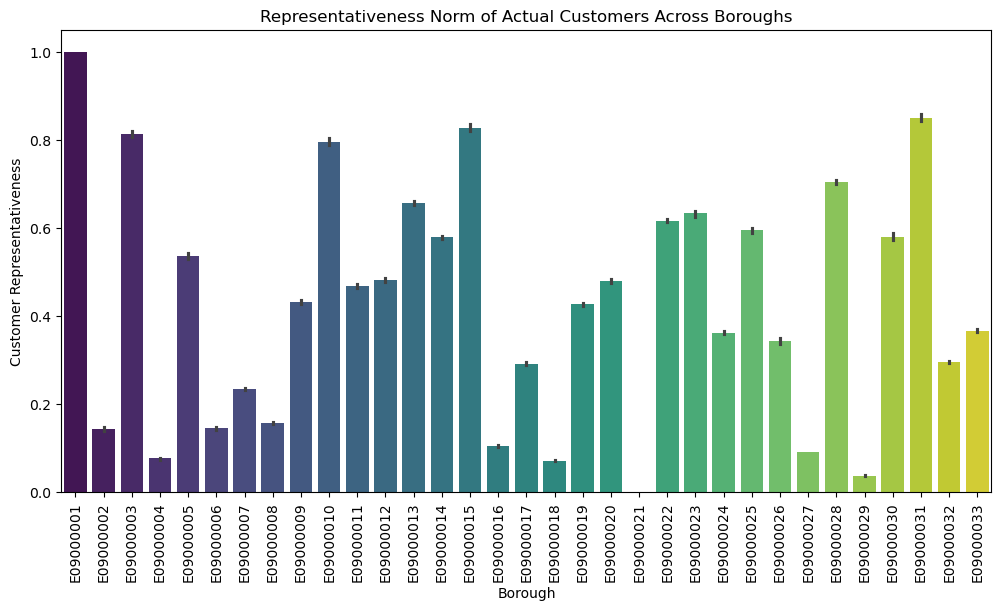

In [28]:
#start with visualisation of Representativeness Norm in each boroughs

# Set figure size
plt.figure(figsize=(12,6))

# Create barplot with legend
sns.barplot(data=df_borough_monthly, x="area_id", y="representativeness_norm", hue="area_id", palette="viridis", legend = False)

# Formatting
plt.xticks(rotation=90)
plt.xlabel("Borough")
plt.ylabel("Customer Representativeness")
plt.title("Representativeness Norm of Actual Customers Across Boroughs")

# Show plot
plt.show()


A

Overlay Tesco Clubcard data to see if population size correlates with shopping activity. Compare this with representativeness_norm to assess if Tesco data is a fair reflection of each borough’s population

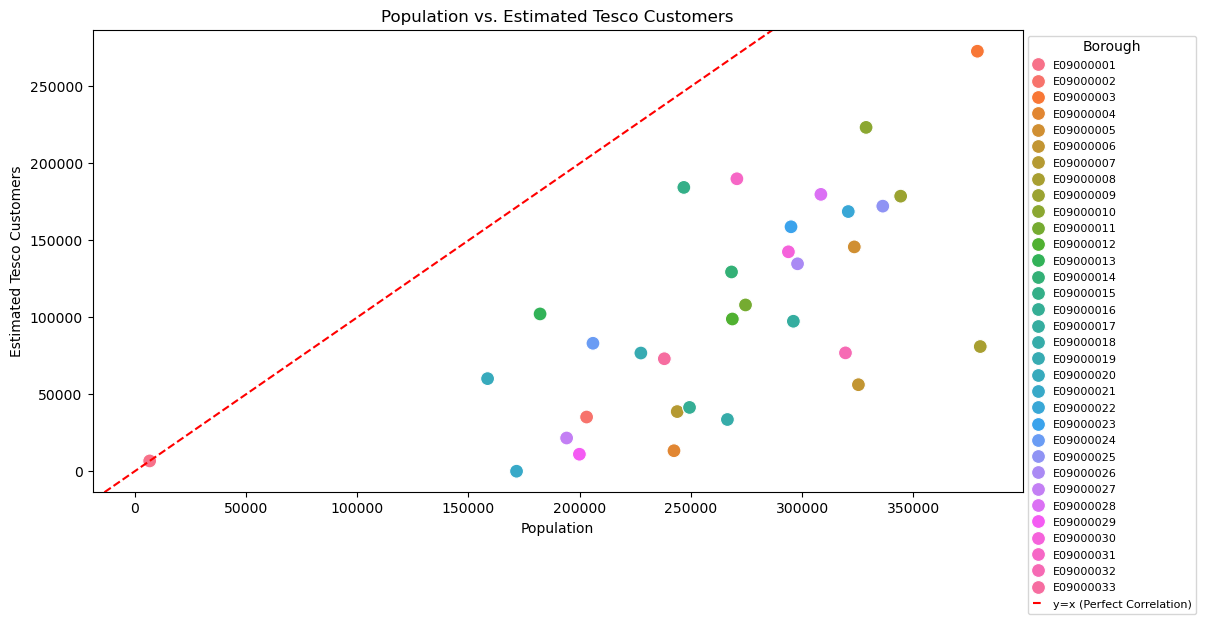

Correlation between Population and Estimated Tesco Customers: 0.65


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Estimated Tesco Customers
df_borough_yearly['Estimated_Tesco_Customers'] = df_borough_yearly['population'] * df_borough_yearly['representativeness_norm']

# Plot Population vs. Estimated Tesco Customers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_borough_yearly, x='population', y='Estimated_Tesco_Customers', hue='area_id', s=100)

plt.xlabel('Population')
plt.ylabel('Estimated Tesco Customers')
plt.title('Population vs. Estimated Tesco Customers')
plt.axline((0, 0), slope=1, color='red', linestyle="--", label='y=x (Perfect Correlation)')
plt.legend(title='Borough', bbox_to_anchor=(1, 1),  # Position the legend outside the plot
    prop={'size': 8},  # Adjust the font size of the legend text
    borderaxespad=0.5,  # Adjust the padding between the legend and axes
    handlelength= 1,  # Adjust the length of the legend handles
    handleheight= 1)

plt.show()

# Calculate and print correlation
correlation = df_borough_yearly['population'].corr(df_borough_yearly['Estimated_Tesco_Customers'])
print(f"Correlation between Population and Estimated Tesco Customers: {correlation:.2f}")


Thus, using scatter plot or correlation value, it is evident that there is no strong correlation between population and representativeness_norm. Thus, we can strongly say, not all residents are active Tesco Clubcard purchasers in London.

#Assumption: Actual population represents the Tesco customer (Clubcard owners)

In [34]:
##Firstly Determine which borough has the highest and lowest frequency of customer visits (distinct no of purchase days / population) over the year

# Group by Month and sum transactions across all boroughs
df_borough_monthly["visit"] = df_borough_monthly["man_day"] / df_borough_monthly["population"]
df_borough_monthly

area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0   E09000001  330.866887            32.5          150.0          260.0   
1   E09000002  415.302544            32.5          170.0          320.0   
2   E09000003  409.869545            39.0          180.0          330.0   
3   E09000004  364.805547            30.0          150.0          290.0   
4   E09000005  426.646722            35.0          175.0          335.0   
..        ...         ...             ...            ...            ...   
28  E09000029  318.592094            30.0          125.0          227.0   
29  E09000030  416.380488            40.0          170.0          300.0   
30  E09000031  434.528453            42.0          190.0          325.0   
31  E09000032  376.886546            39.0          157.6          280.0   
32  E09000033  400.183079            40.0          173.0          300.0   

    weight_perc75  weight_perc97.5  weight_std  weight_ci95      volume  ...  \
0           440.0           1000.0  342.577936     3.607936  104.009275  ...   
1           500.0           1500.0  517.414980     2.451022  127.208198  ...   
2           500.0           1100.0  416.632903     0.549487  119.839131  ...   
3           480.0           1000.0  423.930671     2.409420  112.313670  ...   
4           500.0           1500.0  538.379912     1.062093  134.025334  ...   
..            ...              ...         ...          ...         ...  ...   
28          400.0           1000.0  382.710891     3.614588  104.883033  ...   
29          500.0           1500.0  505.140994     0.932993  117.950244  ...   
30          500.0           1500.0  522.080691     0.742776  119.112970  ...   
31          480.0           1000.0  430.492026     1.277555  107.855843  ...   
32          500.0           1200.0  435.308404     1.149294  110.715397  ...   

    age_0_17  age_18_64  age_65+    avg_age  area_sq_km  people_per_sq_km  \
0     1018.0     4349.0   1320.0  43.910124        2.90       2305.862069   
1    60281.0   123180.0  19640.0  33.017321       36.09       5627.625381   
2    88754.0   237036.0  52988.0  37.195582       86.76       4365.813739   
3    56028.0   146237.0  40122.0  38.880749       60.58       4001.105976   
4    75033.0   211885.0  36525.0  35.766416       43.28       7473.267098   
..       ...        ...      ...        ...         ...               ...   
28   46142.0   123600.0  30128.0  38.449162       43.80       4563.242009   
29   64797.0   211354.0  17677.0  31.514726       19.75      14877.367089   
30   65030.0   177768.0  27873.0  34.990623       38.86       6965.285641   
31   61036.0   229044.0  29397.0  34.811996       34.25       9327.795620   
32   42610.0   167188.0  28249.0  37.157952       21.50      11071.953488   

    Month   Region      frame     visit  
0     Jan  borough  E09000001  1.335128  
1     Jan  borough  E09000002  0.161762  
2     Jan  borough  E09000003  0.905839  
3     Jan  borough  E09000004  0.137103  
4     Jan  borough  E09000005  0.645393  
..    ...      ...        ...       ...  
28    Dec  borough  E09000029  0.085486  
29    Dec  borough  E09000030  0.766339  
30    Dec  borough  E09000031  1.052340  
31    Dec  borough  E09000032  0.325789  
32    Dec  borough  E09000033  0.508026  

[396 rows x 206 columns]

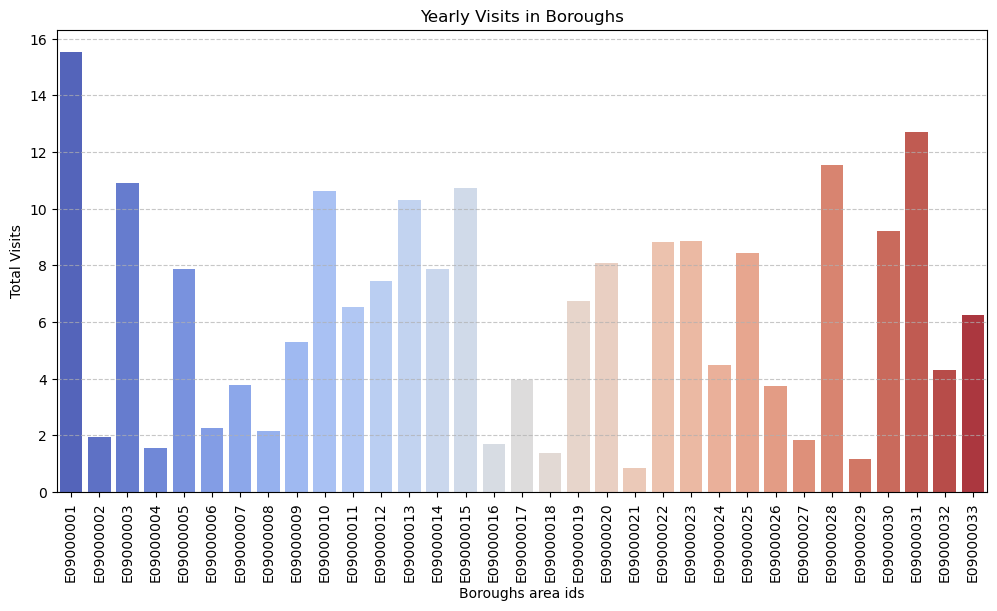

In [35]:
#now, sum over boroughs instead of month
yearly_visits = df_borough_monthly.groupby("area_id", as_index=False)["visit"].sum()

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_visits, x="area_id", y="visit", hue="area_id", dodge=False, palette="coolwarm")

plt.xlabel("Boroughs area ids")
plt.ylabel("Total Visits")
plt.title("Yearly Visits in Boroughs")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Highlight max and min months
plt.xticks(rotation=90)
plt.show()



From the graph it is evident that E09000001 which is The City of London (not a borough) has the highest cutomer visit frequency. Following which the E09000031 has second highest frequency, and the E0900021 has the lowest frequency.

So, now use lets try to finds insights for area id E09000031 with highest frequency, and find which month is busiest for it?

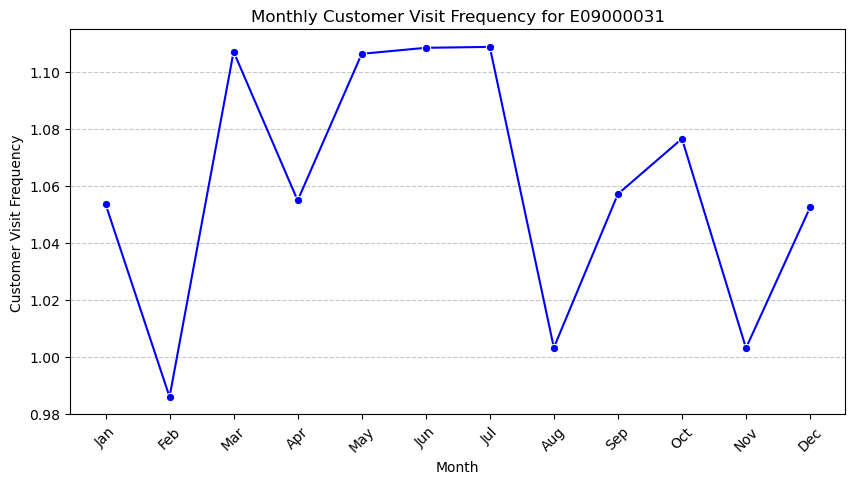

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df_selected_borough = df_borough_monthly[df_borough_monthly["area_id"]== "E09000031"].copy().reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_selected_borough, x="Month", y="visit", marker="o", color="b")

plt.xlabel("Month")
plt.ylabel("Customer Visit Frequency")
plt.title(f"Monthly Customer Visit Frequency for E09000031")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
    
plt.show()


In [39]:
# Find the index of the max  value in the 'visit ' column
max_freq_month = df_selected_borough.loc[df_selected_borough["visit"].idxmax()]

print(f"Maximum customer visit frequency: {max_freq_month['Month']} with {max_freq_month['visit']:6f} customer visit frequency")

Maximum customer visit frequency: Jul with 1.108652 customer visit frequency


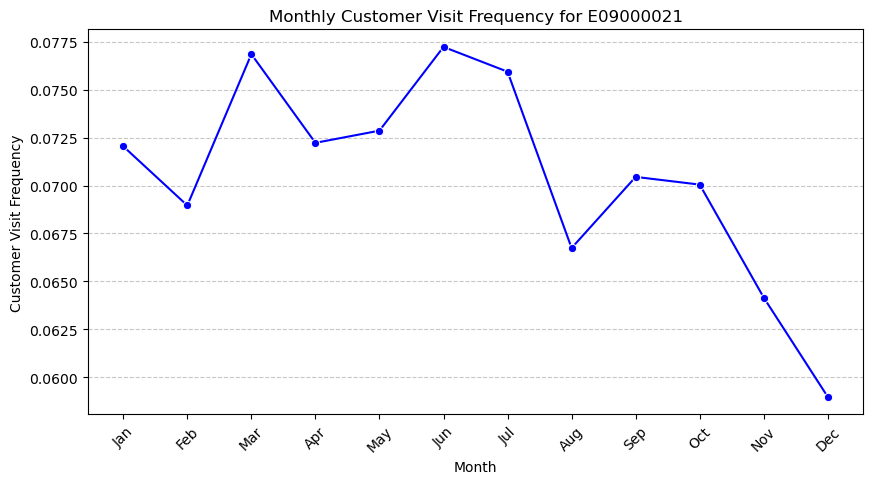

In [40]:
#similarly for area E09000021 with lowest frequency


import matplotlib.pyplot as plt
import seaborn as sns

# Fix: Create a copy to avoid SettingWithCopyWarning
df_selected_borough = df_borough_monthly[df_borough_monthly["area_id"]== "E09000021"].copy().reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_selected_borough, x="Month", y="visit", marker="o", color="b")

plt.xlabel("Month")
plt.ylabel("Customer Visit Frequency")
plt.title(f"Monthly Customer Visit Frequency for E09000021")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
    
plt.show()


In [41]:
# Find the index of the max  value in the 'visit' column
max_freq_month = df_selected_borough.loc[df_selected_borough["visit"].idxmax()]

print(f"Maximum customer visit frequency: {max_freq_month['Month']} with {max_freq_month['visit']:6f} customer visit frequency")

Maximum customer visit frequency: Jun with 0.077234 customer visit frequency


We conclude that July is the busiest month for borough E09000031 with the highest customer visit frequency. Now, let's check if there is any relationship between customer visit frequency and the number of transactions in July for this borough E09000031. 
Here we can expect positive correlation between  Customer visit frequency and No of transaction. 

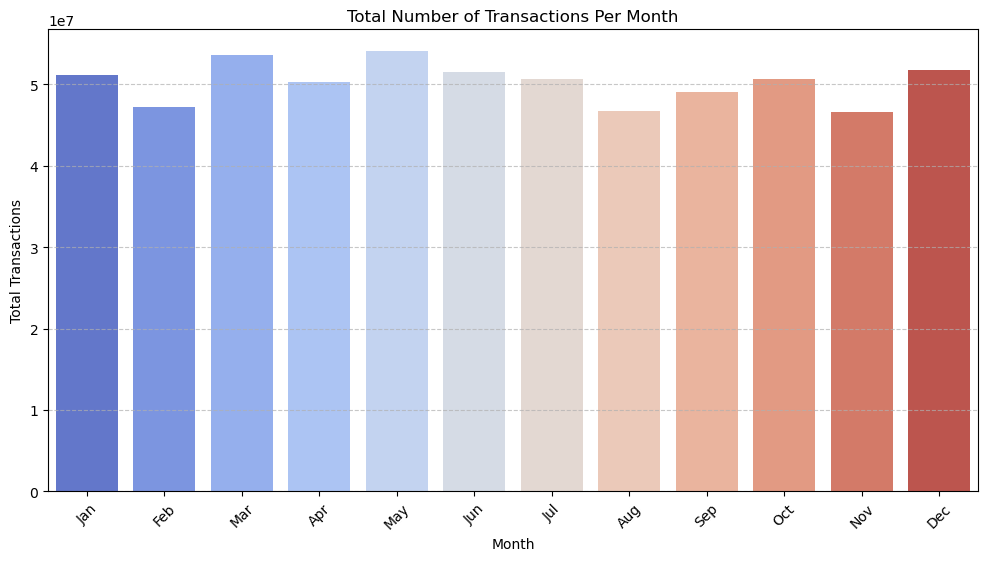

In [43]:
##Determine which month has the highest and lowest number of transactions (product sale) across all boroughs

# Group by Month and sum transactions across all boroughs
monthly_transactions = df_borough_monthly.groupby("Month", as_index=False, observed = False)["num_transactions"].sum()

monthly_transactions["Month"] = pd.Categorical(monthly_transactions["Month"], categories=month_order, ordered=True)


plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_transactions, x="Month", y="num_transactions", hue="Month", dodge=False, palette="coolwarm")

plt.xlabel("Month")
plt.ylabel("Total Transactions")
plt.title("Total Number of Transactions Per Month")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Highlight max and min months
plt.xticks(rotation=45)
plt.show()



In [44]:
print(monthly_transactions)

   Month  num_transactions
0    Jan        51105870.0
1    Feb        47215865.0
2    Mar        53578042.0
3    Apr        50251808.0
4    May        54045693.0
5    Jun        51463824.0
6    Jul        50681511.0
7    Aug        46730517.0
8    Sep        49009560.0
9    Oct        50684109.0
10   Nov        46652513.0
11   Dec        51792291.0


In [45]:
# Filter data for the month of July
df_july = df_borough_monthly[df_borough_monthly["Month"] == "Jul"].copy()
#print(df_july)

# Correlation between visit frequency and number of transactions
correlation = df_july["visit"].corr(df_july["num_transactions"])

# Print the correlation
print(f"Correlation between customer visit frequency and number of transactions in July for borough E09000031: {correlation:.2f}")
print("\n")


Correlation between customer visit frequency and number of transactions in July for borough E09000031: 0.73




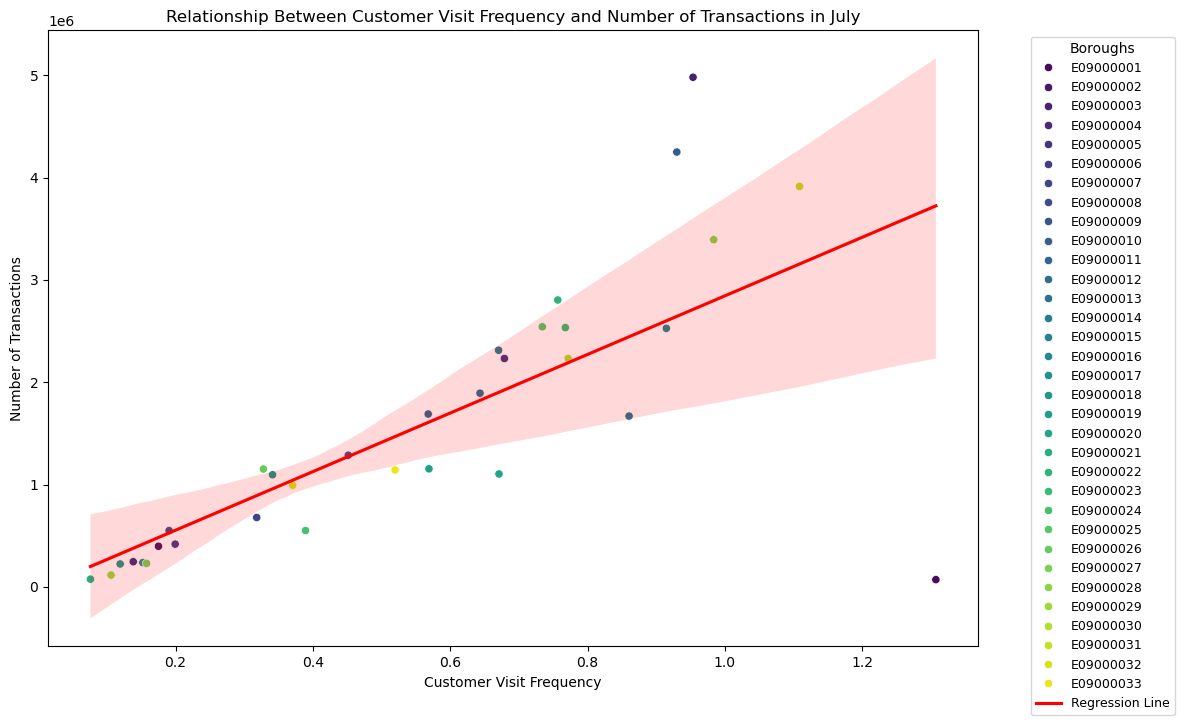

In [46]:
# You can also visualize the relationship using a scatter plot:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_july, x="visit", y="num_transactions", hue="area_id", palette="viridis")
sns.regplot(data=df_july, x="visit", y="num_transactions", scatter=False, color="red", label='Regression Line')
plt.xlabel("Customer Visit Frequency")
plt.ylabel("Number of Transactions")
plt.title("Relationship Between Customer Visit Frequency and Number of Transactions in July")
plt.legend(title="Boroughs", bbox_to_anchor=(1.05, 1), prop={'size': 9})
plt.show()

The moderate-to-strong positive correlation (0.73) indicates that boroughs with higher customer visit frequencies tend to have more transactions in July. The regression line highlights this trend, and the narrow confidence interval suggests the relationship is statistically reliable.

In [48]:
# Mapping dictionary to rename food type columns
food_rename_mapping = {
    'f_fruit_veg': 'Fruit & Vegetables',
    'f_beer': 'Beer',
    'f_dairy': 'Dairy',
    'f_eggs': 'Eggs',
    'f_fats_oils': 'Fats & Oils',
    'f_fish': 'Fish',
    'f_grains': 'Grains',
    'f_meat_red': 'Red Meat',
    'f_poultry': 'Poultry',
    'f_readymade': 'Ready-made Meals',
    'f_sauces': 'Sauces',
    'f_soft_drinks': 'Soft Drinks',
    'f_spirits': 'Spirits',
    'f_sweets': 'Sweets',
    'f_tea_coffee': 'Tea & Coffee',
    'f_water': 'Water',
    'f_wine': 'Wine'
}
# Rename the columns in the DataFrame
map_data_renamed = map_data.rename(columns=food_rename_mapping)

# Display the updated DataFrame
map_data_renamed.head()


name    area_id  \
0        City of London  E09000001   
1  Barking and Dagenham  E09000002   
2                Barnet  E09000003   
3                Bexley  E09000004   
4                 Brent  E09000005   

                                            geometry      weight      volume  \
0  POLYGON ((531145.100 180782.100, 531143.800 18...  323.174750   98.842963   
1  MULTIPOLYGON (((543905.400 183199.100, 543905....  421.304125  122.341294   
2  POLYGON ((524579.900 198355.200, 524594.300 19...  407.170491  114.933771   
3  POLYGON ((547226.200 181299.300, 547320.900 18...  359.544126  106.446426   
4  POLYGON ((525201.000 182512.600, 525181.500 18...  434.324141  128.930369   

        fat  saturate      salt      sugar   protein  ...    female  age_0_17  \
0  8.472985  3.361599  0.530496   9.278065  5.253333  ...    2990.0    1018.0   
1  9.209959  3.596834  0.603081  10.793244  5.193872  ...  103659.0   60281.0   
2  8.594464  3.407353  0.567211   9.530548  5.129627  ...  192421.0   88754.0   
3  9.119180  3.466346  0.591326  10.941085  5.304496  ...  125573.0   56028.0   
4  8.962466  3.559913  0.570477  10.148610  5.132915  ...  159504.0   75033.0   

   age_18_64  age_65+    avg_age  area_sq_km  people_per_sq_km  month  \
0     4349.0   1320.0  43.910124        2.90       2305.862069   year   
1   123180.0  19640.0  33.017321       36.09       5627.625381   year   
2   237036.0  52988.0  37.195582       86.76       4365.813739   year   
3   146237.0  40122.0  38.880749       60.58       4001.105976   year   
4   211885.0  36525.0  35.766416       43.28       7473.267098   year   

    region                       centroid  
0  borough  POINT (532479.634 181271.833)  
1  borough  POINT (548040.122 185087.790)  
2  borough  POINT (524027.595 192316.340)  
3  borough  POINT (548794.417 175487.156)  
4  borough  POINT (520177.868 185829.516)  

[5 rows x 46 columns]

In [49]:
map_data_renamed.columns.tolist()

['name',
 'area_id',
 'geometry',
 'weight',
 'volume',
 'fat',
 'saturate',
 'salt',
 'sugar',
 'protein',
 'carb',
 'fibre',
 'alcohol',
 'Beer',
 'Dairy',
 'Eggs',
 'Fats & Oils',
 'Fish',
 'Fruit & Vegetables',
 'Grains',
 'Red Meat',
 'Poultry',
 'Ready-made Meals',
 'Sauces',
 'Soft Drinks',
 'Spirits',
 'Sweets',
 'Tea & Coffee',
 'Water',
 'Wine',
 'unique_cust_norm',
 'transaction_days',
 'num_products',
 'customer_visits',
 'population',
 'male',
 'female',
 'age_0_17',
 'age_18_64',
 'age_65+',
 'avg_age',
 'area_sq_km',
 'people_per_sq_km',
 'month',
 'region',
 'centroid']

In [50]:
import pandas as pd
import numpy as np

# Randomly select 5 boroughs
random_boroughs = np.random.choice(map_data_renamed['name'].unique(), size=5, replace=False)

# Filter the dataset for the selected boroughs
random_boroughs_df = map_data_renamed[map_data_renamed['name'].isin(random_boroughs)]

# Display the selected boroughs
random_boroughs_df[['name', 'Fruit & Vegetables',
    'Beer', 'Dairy', 'Eggs', 'Fats & Oils', 'Fish', 
    'Grains', 'Red Meat', 'Poultry', 'Ready-made Meals', 'Sauces', 'Soft Drinks', 
    'Spirits', 'Sweets', 'Tea & Coffee', 'Water', 'Wine']].head()

name  Fruit & Vegetables      Beer     Dairy      Eggs  \
8                 Ealing            0.303364  0.014243  0.115131  0.012811   
17              Hounslow            0.285183  0.014150  0.105080  0.010154   
20  Kingston upon Thames            0.267838  0.018333  0.094369  0.008887   
31            Wandsworth            0.294629  0.018823  0.108012  0.012962   
32           Westminster            0.314086  0.011484  0.125235  0.015223   

    Fats & Oils      Fish    Grains  Red Meat   Poultry  Ready-made Meals  \
8      0.029560  0.022682  0.142617  0.049917  0.019974          0.053913   
17     0.025077  0.020000  0.151530  0.043195  0.017748          0.068122   
20     0.020724  0.018933  0.161991  0.038356  0.018226          0.085632   
31     0.027796  0.023020  0.141700  0.047304  0.020967          0.057729   
32     0.030723  0.024516  0.133382  0.041930  0.018919          0.045471   

      Sauces  Soft Drinks   Spirits    Sweets  Tea & Coffee     Water  \
8   0.014388     0.023124  0.003230  0.146897      0.006160  0.025098   
17  0.013023     0.028579  0.003298  0.165895      0.006365  0.026237   
20  0.011539     0.032124  0.003200  0.172448      0.006039  0.025765   
31  0.014216     0.027503  0.003164  0.146673      0.005410  0.027491   
32  0.012281     0.021308  0.002437  0.147929      0.005990  0.031305   

        Wine  
8   0.016891  
17  0.016364  
20  0.015595  
31  0.022600  
32  0.017781

In [51]:
# Reshape the data for plotting
melted_df = pd.melt(
    random_boroughs_df,
    id_vars=['name'],  # Keep borough ID as the identifier
    value_vars=['Fruit & Vegetables',
    'Beer', 'Dairy', 'Eggs', 'Fats & Oils', 'Fish', 
    'Grains', 'Red Meat', 'Poultry', 'Ready-made Meals', 'Sauces', 'Soft Drinks', 
    'Spirits', 'Sweets', 'Tea & Coffee', 'Water', 'Wine'],  # Food categories
    var_name='Food Category',  # New column for food categories
    value_name='Fraction'  # New column for fraction values
)

# Display the reshaped data
melted_df

name       Food Category  Fraction
0                 Ealing  Fruit & Vegetables  0.303364
1               Hounslow  Fruit & Vegetables  0.285183
2   Kingston upon Thames  Fruit & Vegetables  0.267838
3             Wandsworth  Fruit & Vegetables  0.294629
4            Westminster  Fruit & Vegetables  0.314086
..                   ...                 ...       ...
80                Ealing                Wine  0.016891
81              Hounslow                Wine  0.016364
82  Kingston upon Thames                Wine  0.015595
83            Wandsworth                Wine  0.022600
84           Westminster                Wine  0.017781

[85 rows x 3 columns]

In [52]:
# Normalize the fractions so they sum to 1 for each borough
melted_df['Normalized Fraction'] = melted_df.groupby('name')['Fraction'].transform(lambda x: x / x.sum())
melted_df

name       Food Category  Fraction  Normalized Fraction
0                 Ealing  Fruit & Vegetables  0.303364             0.303364
1               Hounslow  Fruit & Vegetables  0.285183             0.285183
2   Kingston upon Thames  Fruit & Vegetables  0.267838             0.267838
3             Wandsworth  Fruit & Vegetables  0.294629             0.294629
4            Westminster  Fruit & Vegetables  0.314086             0.314086
..                   ...                 ...       ...                  ...
80                Ealing                Wine  0.016891             0.016891
81              Hounslow                Wine  0.016364             0.016364
82  Kingston upon Thames                Wine  0.015595             0.015595
83            Wandsworth                Wine  0.022600             0.022600
84           Westminster                Wine  0.017781             0.017781

[85 rows x 4 columns]

In [53]:
# Sort the data to get the top 3 fractions for each borough
melted_df['Rank'] = melted_df.groupby('name')['Normalized Fraction'].rank(ascending=False)
filtered_df = melted_df[melted_df['Rank'] <= 3]
melted_df

name       Food Category  Fraction  Normalized Fraction  \
0                 Ealing  Fruit & Vegetables  0.303364             0.303364   
1               Hounslow  Fruit & Vegetables  0.285183             0.285183   
2   Kingston upon Thames  Fruit & Vegetables  0.267838             0.267838   
3             Wandsworth  Fruit & Vegetables  0.294629             0.294629   
4            Westminster  Fruit & Vegetables  0.314086             0.314086   
..                   ...                 ...       ...                  ...   
80                Ealing                Wine  0.016891             0.016891   
81              Hounslow                Wine  0.016364             0.016364   
82  Kingston upon Thames                Wine  0.015595             0.015595   
83            Wandsworth                Wine  0.022600             0.022600   
84           Westminster                Wine  0.017781             0.017781   

    Rank  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
..   ...  
80  12.0  
81  12.0  
82  13.0  
83  11.0  
84  12.0  

[85 rows x 5 columns]

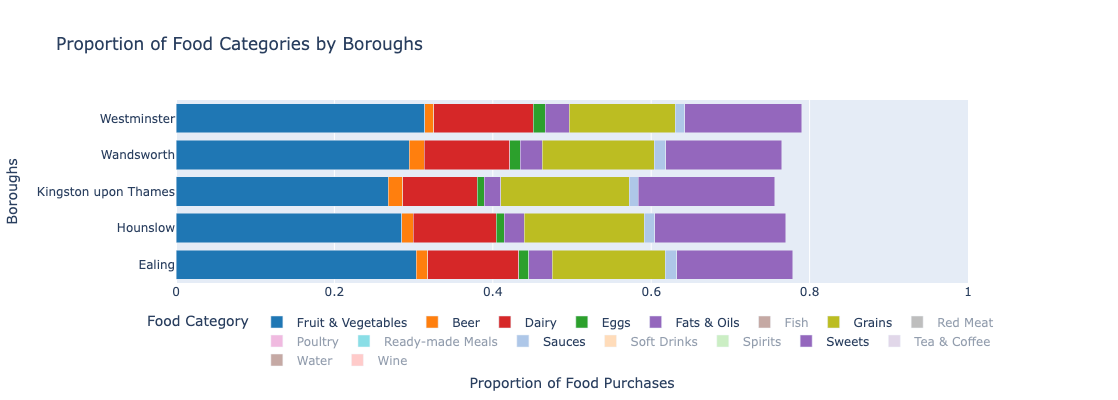

In [54]:
import plotly.express as px
# Define a custom color palette
custom_colors = {
    'Fruit & Vegetables': '#1f77b4',  # Blue
    'Beer': '#ff7f0e',                # Orange
    'Dairy': '#d62728',               # Red
    'Eggs': '#2ca02c',                # Green
    'Fats & Oils': '#9467bd',         # Purple
    'Fish': '#8c564b',                 # Brown
    'Grains': '#bcbd22',              # Yellow-Green
    'Red Meat': '#7f7f7f',            # Gray
    'Poultry': '#e377c2',             # Pink
    'Ready-made Meals': '#17becf',    # Cyan
    'Sauces': '#aec7e8',              # Light Blue
    'Soft Drinks': '#ffbb78',         # Light Orange
    'Spirits': '#98df8a',             # Light Green
    'Sweets': '#9467bd',              # Purple 
    'Tea & Coffee': '#c5b0d5',        # Light Purple
    'Water': '#8c564b',               # Brown 
    'Wine': '#ff9896'                 # Light Red/Pink
}


# Create the stacked bar chart
fig = px.bar(
    melted_df,  # Use full dataset (hide non-top3 categories by default)
    y='name',
    x='Normalized Fraction',
    color='Food Category',
    orientation='h',
    title='Proportion of Food Categories by Boroughs',
    labels={'name': 'Boroughs', 'Normalized Fraction': 'Proportion of Food Purchases'},
    color_discrete_map=custom_colors
)

# Set visibility: Top 3 are visible, others are hidden initially
for trace in fig.data:
    category = trace.name
    if category not in filtered_df['Food Category'].unique():
        trace.visible = "legendonly"  # Hidden by default


# Hide hover info completely
#fig.update_traces(hoverinfo='none', hovertemplate = None)

# Update layout
fig.update_layout(
    yaxis_title='Boroughs',
    xaxis_title='Proportion of Food Purchases',
    xaxis=dict(range=[0, 1], title_standoff=80),
    barmode='stack',
    height=400,
    width=1100,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.5,
        xanchor='center',
        x=0.5
    ),
    margin=dict(l=100, r=150)
)

# Show the interactive plot
fig.show()

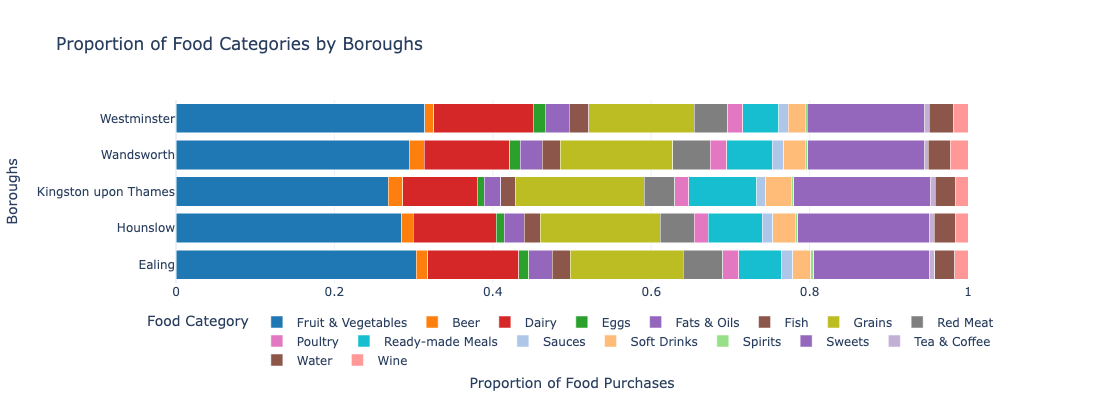

In [55]:
import plotly.express as px

# Define a custom color palette
custom_colors = {
    'Fruit & Vegetables': '#1f77b4',  # Blue
    'Beer': '#ff7f0e',                # Orange
    'Dairy': '#d62728',               # Green
    'Eggs': '#2ca02c',                # Red
    'Fats & Oils': '#9467bd',         # Purple
    'Fish': '#8c564b',                # Brown
    'Grains': '#bcbd22',              # Pink
    'Red Meat': '#7f7f7f',            # Gray
    'Poultry': '#e377c2',             # Olive
    'Ready-made Meals': '#17becf',    # Cyan
    'Sauces': '#aec7e8',              # Light Blue
    'Soft Drinks': '#ffbb78',         # Light Orange
    'Spirits': '#98df8a',             # Light Green
    'Sweets': '#9467bd',              # Light Red
    'Tea & Coffee': '#c5b0d5',        # Light Purple
    'Water': '#8c564b',               # Brown
    'Wine': '#ff9896'                 # Purple
}

# Create the stacked bar chart
fig = px.bar(
    melted_df,  # Your dataset
    y='name',
    x='Normalized Fraction',
    color='Food Category',
    orientation='h',
    title='Proportion of Food Categories by Boroughs',
    labels={'name': 'Boroughs', 'Normalized Fraction': 'Proportion of Food Purchases'},
    color_discrete_map=custom_colors  # Use custom color palette
)

# Fix opacity and ensure colors are fully opaque
fig.update_traces(hoverinfo='none', hovertemplate = None)

# Update layout
fig.update_layout(
    yaxis_title='Boroughs',
    xaxis_title='Proportion of Food Purchases',
    xaxis=dict(range=[0, 1], title_standoff=80),
    barmode='stack',
    height=400,
    width=1100,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.5,
        xanchor='center',
        x=0.5
    ),
    margin=dict(l=100, r=150),
    template='plotly_white'  # Use a neutral template
)

# Show the interactive plot
fig.show()

In [56]:
#task 2- second insight

# List the fraction columns you want to check
food_types = ['f_beer', 'f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_meat_red', 
                    'f_poultry', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_tea_coffee', 
                    'f_water', 'f_wine']

# Get summary statistics for these columns
df_borough_monthly[food_types].describe()
# Group by 'Month' and calculate mean for specified food types
monthly_mean = df_borough_monthly[food_types].groupby(df_borough_monthly['Month'], observed = False).mean()
# Reset the index to have a default integer index
monthly_food_mean = monthly_mean.reset_index(drop=True)

monthly_food_mean

f_beer   f_dairy    f_eggs  f_fats_oils    f_fish  f_fruit_veg  \
0   0.010142  0.112717  0.012047     0.028461  0.022190     0.283961   
1   0.011346  0.109074  0.011761     0.028351  0.020959     0.275987   
2   0.012024  0.107346  0.011426     0.028420  0.022152     0.274025   
3   0.015108  0.106547  0.011900     0.030400  0.022925     0.285599   
4   0.016071  0.106284  0.011854     0.029617  0.021422     0.290770   
5   0.016432  0.106916  0.010879     0.027613  0.021337     0.298351   
6   0.019147  0.105345  0.011138     0.027205  0.021753     0.294203   
7   0.017762  0.108096  0.011787     0.028355  0.021829     0.282780   
8   0.014218  0.108286  0.011703     0.028806  0.021821     0.284588   
9   0.014112  0.105711  0.012410     0.029734  0.021998     0.278185   
10  0.012808  0.105455  0.012462     0.029878  0.022013     0.279072   
11  0.015885  0.095932  0.012517     0.035294  0.020985     0.266951   

    f_grains  f_meat_red  f_poultry  f_readymade  f_sauces  f_soft_drinks  \
0   0.151539    0.049897   0.021437     0.063592  0.017431       0.025810   
1   0.154573    0.048437   0.020401     0.060425  0.016202       0.027649   
2   0.149273    0.048735   0.020467     0.059461  0.015811       0.027236   
3   0.147769    0.048047   0.020381     0.057154  0.012662       0.029647   
4   0.146025    0.048470   0.020538     0.056305  0.013312       0.029069   
5   0.140921    0.048616   0.020352     0.058530  0.012299       0.031437   
6   0.143074    0.050040   0.020263     0.058373  0.012420       0.031264   
7   0.146585    0.049058   0.020825     0.059871  0.013129       0.032333   
8   0.148809    0.048631   0.020010     0.060566  0.015186       0.026229   
9   0.146078    0.047726   0.019717     0.063883  0.014851       0.028650   
10  0.146079    0.047256   0.019796     0.062533  0.015611       0.025639   
11  0.143784    0.050207   0.018223     0.057343  0.014842       0.031106   

    f_spirits  f_sweets  f_tea_coffee   f_water    f_wine  
0    0.002398  0.147910      0.007785  0.028475  0.014208  
1    0.002430  0.161088      0.006869  0.028305  0.016144  
2    0.002799  0.169433      0.005848  0.029893  0.015651  
3    0.002682  0.154549      0.005293  0.031357  0.017979  
4    0.002625  0.154561      0.005480  0.031524  0.016074  
5    0.002761  0.149582      0.005369  0.033262  0.015345  
6    0.002799  0.149041      0.004857  0.032943  0.016134  
7    0.002946  0.152454      0.005063  0.031034  0.016093  
8    0.002613  0.157039      0.006106  0.029777  0.015613  
9    0.003876  0.161767      0.005569  0.028521  0.017211  
10   0.004397  0.164304      0.006697  0.027806  0.018193  
11   0.006969  0.170011      0.005441  0.029882  0.024628

In [57]:
import numpy as np
import warnings
from mlxtend.frequent_patterns import apriori, association_rules

# Suppress RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Step 1: Binarize the Data
threshold = 0.05
binary_data = monthly_food_mean.apply(lambda x: x > threshold)

# Step 2: Check for NaN or unexpected values
print("NaN values in binary_data:")
print(binary_data.isnull().sum())

# Handle NaN values (if any)
binary_data = binary_data.fillna(False)

NaN values in binary_data:
f_beer           0
f_dairy          0
f_eggs           0
f_fats_oils      0
f_fish           0
f_fruit_veg      0
f_grains         0
f_meat_red       0
f_poultry        0
f_readymade      0
f_sauces         0
f_soft_drinks    0
f_spirits        0
f_sweets         0
f_tea_coffee     0
f_water          0
f_wine           0
dtype: int64


In [58]:
# Step 3: Apply Apriori Algorithm
frequent_itemsets = apriori(binary_data, min_support=0.5, use_colnames=True)  # Reduced min_support
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
    support                                           itemsets
0       1.0                                          (f_dairy)
1       1.0                                      (f_fruit_veg)
2       1.0                                         (f_grains)
3       1.0                                      (f_readymade)
4       1.0                                         (f_sweets)
5       1.0                             (f_fruit_veg, f_dairy)
6       1.0                                (f_grains, f_dairy)
7       1.0                             (f_readymade, f_dairy)
8       1.0                                (f_dairy, f_sweets)
9       1.0                            (f_fruit_veg, f_grains)
10      1.0                         (f_readymade, f_fruit_veg)
11      1.0                            (f_fruit_veg, f_sweets)
12      1.0                            (f_readymade, f_grains)
13      1.0                               (f_grains, f_sweets)
14      1.0                         

In [59]:
# Step 4: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1.0)  # Reduced min_threshold

In [60]:
# Step 5: Filter Out Invalid Rules
rules = rules[~rules['lift'].isnull() & ~rules['lift'].isin([np.inf, -np.inf])]

# Step 6: Evaluate Rules Based on Support, Confidence, and Lift
rules['score'] = rules['support'] * rules['confidence'] * rules['lift']

# Step 7: Select Random 5 Rules
random_rules = rules.sample(n=5, random_state= 30)  # Set random_state for reproducibility

# Step 8: Print the Random 5 Rules
print("5 Random Rules:")
for i, row in random_rules.iterrows():
    antecedents = ", ".join(list(row['antecedents']))
    consequents = ", ".join(list(row['consequents']))
    print("\n")
    print(f"Rule {i+1}: {antecedents} -> {consequents}")
    print(f"  Support: {row['support']:.2f}, Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f}")

5 Random Rules:


Rule 74: f_sweets -> f_readymade, f_fruit_veg
  Support: 1.00, Confidence: 1.00, Lift: 1.00


Rule 25: f_grains -> f_fruit_veg, f_dairy
  Support: 1.00, Confidence: 1.00, Lift: 1.00


Rule 172: f_grains, f_sweets -> f_readymade, f_fruit_veg, f_dairy
  Support: 1.00, Confidence: 1.00, Lift: 1.00


Rule 113: f_fruit_veg, f_readymade -> f_dairy, f_sweets
  Support: 1.00, Confidence: 1.00, Lift: 1.00


Rule 167: f_readymade, f_fruit_veg -> f_grains, f_dairy, f_sweets
  Support: 1.00, Confidence: 1.00, Lift: 1.00


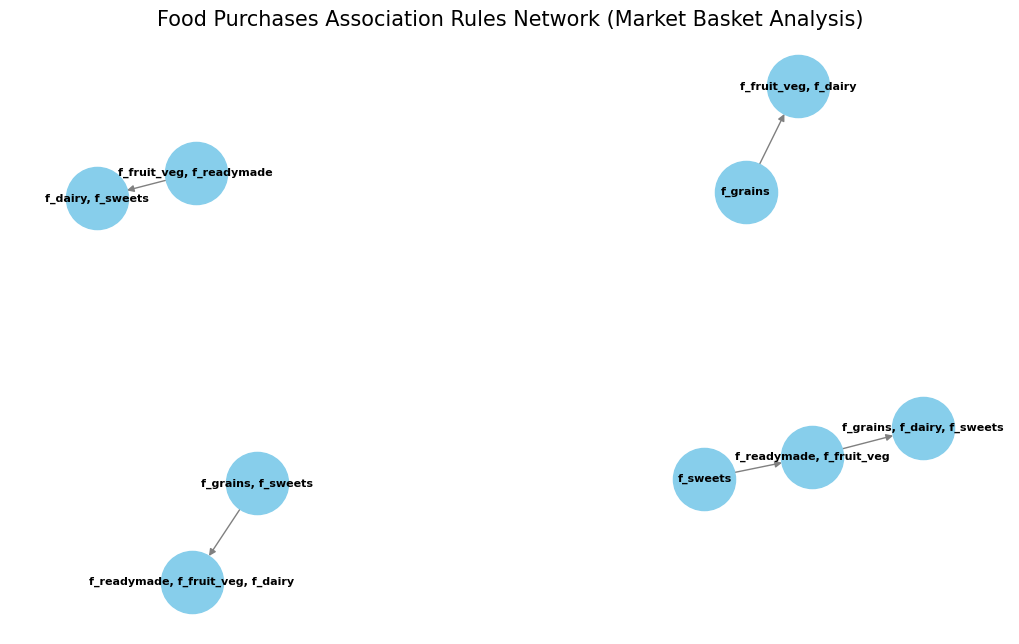

In [61]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges (rules) to the graph
for _, row in random_rules.iterrows():
    G.add_edge(", ".join(row['antecedents']), ", ".join(row['consequents']), weight=row['lift'])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=0.5)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=8,  font_weight='bold', edge_color='gray', width=[G[u][v]['weight'] for u, v in G.edges()])
plt.title("Food Purchases Association Rules Network (Market Basket Analysis)", fontsize=15)
plt.show()

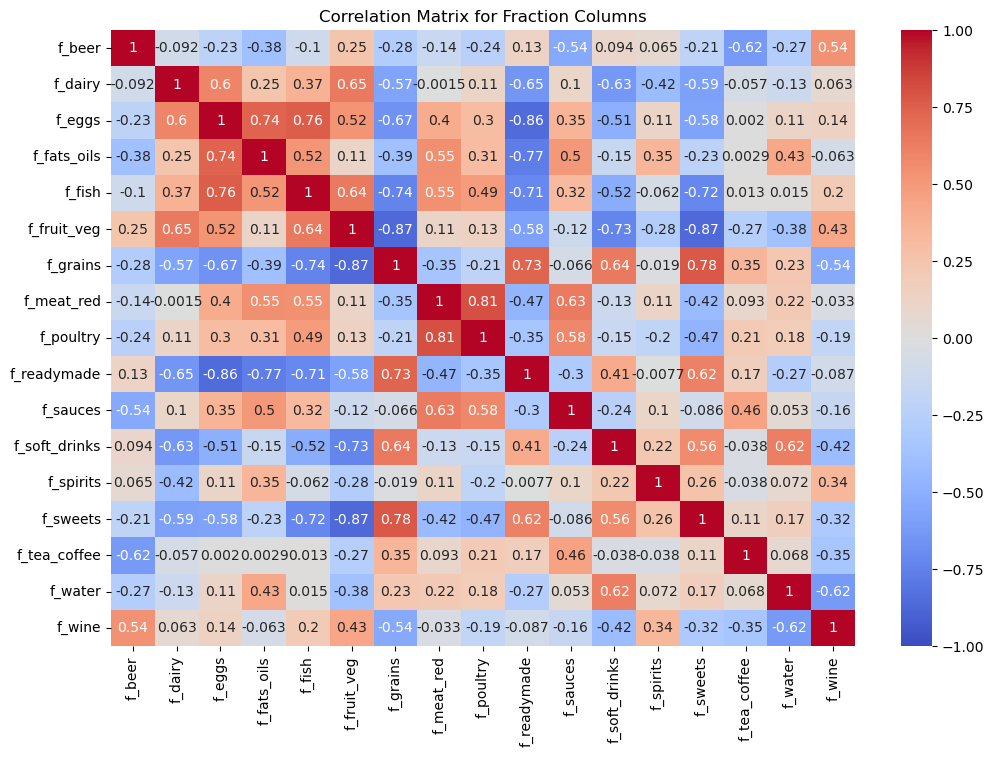

In [62]:
# Correlation matrix for the fraction columns
correlation_matrix = df_borough_monthly[food_types].corr()

# Plot the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Fraction Columns")
plt.show()


Positive Correlation Between Poultry and Red Meat Consumption (r = 0.81): Individuals or regions with higher consumption of poultry products also tend to have higher consumption of red meat. This could indicate that these consumers have a higher overall meat consumption, preferring both types, or it might reflect cultural or socioeconomic factors that promote higher meat intake in certain demographics.

Negative Correlation Between Fruit and Vegetable Consumption and Sweet Consumption (r = -0.87): Higher consumption of fruits and vegetables is associated with lower consumption of sweets. This suggests that consumers who prioritize healthier food options may limit their intake of sugary foods, possibly due to health consciousness or dietary preferences.


TASK 3

In [65]:

tesco_df = df_borough_monthly[['area_id', 'weight','volume', 'fat', 'saturate', 'salt', 'sugar', 'protein', 'carb', 'fibre', 'alcohol', 'f_beer', 'f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 'f_fruit_veg', 'f_grains', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces', 'f_soft_drinks', 'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine', 'energy_tot', 'representativeness_norm', 'transaction_days', 'num_transactions', 'man_day', 'population', 'male', 'female', 'age_0_17', 'age_18_64', 'age_65+', 'avg_age', 'area_sq_km', 'people_per_sq_km', 'Month', 'Region']]
tesco_df

area_id      weight      volume        fat  saturate      salt  \
0   E09000001  330.866887  104.009275   8.164527  3.248682  0.551583   
1   E09000002  415.302544  127.208198   8.786498  3.434757  0.621555   
2   E09000003  409.869545  119.839131   8.195621  3.241634  0.584918   
3   E09000004  364.805547  112.313670   8.492302  3.224135  0.611798   
4   E09000005  426.646722  134.025334   8.552928  3.383105  0.592456   
..        ...         ...         ...        ...       ...       ...   
28  E09000029  318.592094  104.883033  10.273078  4.026804  0.571992   
29  E09000030  416.380488  117.950244   9.805574  3.877056  0.610121   
30  E09000031  434.528453  119.112970   9.971714  4.047997  0.637900   
31  E09000032  376.886546  107.855843   9.721846  3.927598  0.596985   
32  E09000033  400.183079  110.715397   9.474448  3.811936  0.548827   

        sugar   protein       carb     fibre  ...      male    female  \
0    8.951228  5.393788  15.803970  1.645398  ...    3697.0    2990.0   
1   10.450692  5.277972  19.965530  1.634745  ...   99442.0  103659.0   
2    9.280870  5.231916  17.180512  1.688865  ...  186357.0  192421.0   
3   10.530100  5.409954  20.304039  1.726626  ...  116814.0  125573.0   
4    9.914390  5.268881  18.976397  1.648457  ...  163939.0  159504.0   
..        ...       ...        ...       ...  ...       ...       ...   
28  12.036531  5.272579  20.472261  1.625849  ...   97427.0  102443.0   
29  10.701686  5.277204  19.356105  1.579758  ...  152762.0  141066.0   
30  10.155057  5.364066  18.589396  1.546159  ...  135651.0  135020.0   
31  10.128775  5.335282  18.040184  1.570392  ...  154118.0  165359.0   
32   9.836127  5.278656  17.666467  1.575242  ...  123356.0  114691.0   

    age_0_17  age_18_64  age_65+    avg_age  area_sq_km  people_per_sq_km  \
0     1018.0     4349.0   1320.0  43.910124        2.90       2305.862069   
1    60281.0   123180.0  19640.0  33.017321       36.09       5627.625381   
2    88754.0   237036.0  52988.0  37.195582       86.76       4365.813739   
3    56028.0   146237.0  40122.0  38.880749       60.58       4001.105976   
4    75033.0   211885.0  36525.0  35.766416       43.28       7473.267098   
..       ...        ...      ...        ...         ...               ...   
28   46142.0   123600.0  30128.0  38.449162       43.80       4563.242009   
29   64797.0   211354.0  17677.0  31.514726       19.75      14877.367089   
30   65030.0   177768.0  27873.0  34.990623       38.86       6965.285641   
31   61036.0   229044.0  29397.0  34.811996       34.25       9327.795620   
32   42610.0   167188.0  28249.0  37.157952       21.50      11071.953488   

    Month   Region  
0     Jan  borough  
1     Jan  borough  
2     Jan  borough  
3     Jan  borough  
4     Jan  borough  
..    ...      ...  
28    Dec  borough  
29    Dec  borough  
30    Dec  borough  
31    Dec  borough  
32    Dec  borough  

[396 rows x 44 columns]

In [66]:
path_2 = r"/Users/kajolpawar/Documents/SEM2/ADS/CW"
edu_file = r"education.csv"
edu_df = pd.read_csv(path_2 + '/' + edu_file)
edu_df
print(edu_df.columns.tolist())

['Lower tier local authorities Code', 'Lower tier local authorities', 'Highest level of qualification (8 categories) Code', 'Highest level of qualification (8 categories)', 'Economic activity status (7 categories) Code', 'Economic activity status (7 categories)', 'Observation']


In [67]:
matching_area = tesco_df["area_id"].unique() 
edu_df = edu_df[edu_df["Lower tier local authorities Code"].isin(matching_area)]
edu_df.to_csv("borough_educationdata.csv", index=False)
edu_df

Lower tier local authorities Code Lower tier local authorities  \
15456                         E09000001               City of London   
15457                         E09000001               City of London   
15458                         E09000001               City of London   
15459                         E09000001               City of London   
15460                         E09000001               City of London   
...                                 ...                          ...   
17299                         E09000033                  Westminster   
17300                         E09000033                  Westminster   
17301                         E09000033                  Westminster   
17302                         E09000033                  Westminster   
17303                         E09000033                  Westminster   

       Highest level of qualification (8 categories) Code  \
15456                                                 -8    
15457                                                 -8    
15458                                                 -8    
15459                                                 -8    
15460                                                 -8    
...                                                  ...    
17299                                                  6    
17300                                                  6    
17301                                                  6    
17302                                                  6    
17303                                                  6    

           Highest level of qualification (8 categories)  \
15456                                     Does not apply   
15457                                     Does not apply   
15458                                     Does not apply   
15459                                     Does not apply   
15460                                     Does not apply   
...                                                  ...   
17299  Other: vocational or work-related qualificatio...   
17300  Other: vocational or work-related qualificatio...   
17301  Other: vocational or work-related qualificatio...   
17302  Other: vocational or work-related qualificatio...   
17303  Other: vocational or work-related qualificatio...   

       Economic activity status (7 categories) Code  \
15456                                            -8   
15457                                             1   
15458                                             2   
15459                                             3   
15460                                             4   
...                                             ...   
17299                                             2   
17300                                             3   
17301                                             4   
17302                                             5   
17303                                             6   

                 Economic activity status (7 categories)  Observation  
15456                                     Does not apply          579  
15457  Economically active (excluding full-time stude...            0  
15458  Economically active (excluding full-time stude...            0  
15459  Economically active and a full-time student: I...            0  
15460  Economically active and a full-time student: U...            0  
...                                                  ...          ...  
17299  Economically active (excluding full-time stude...          163  
17300  Economically active and a full-time student: I...           82  
17301  Economically active and a full-time student: U...           65  
17302  Economically inactive (excluding full-time stu...         2063  
17303      Economically inactive and a full-time student          704  

[1848 rows x 7 columns]

In [68]:
import pandas as pd

# Aggregate Tesco data to borough-level (2015 averages)
tesco_borough = tesco_df.groupby('area_id').agg({
    'weight': 'mean','volume': 'mean', 'fat': 'mean', 'salt': 'mean', 'sugar': 'mean', 
    'protein': 'mean', 'carb': 'mean', 'fibre': 'mean', 'alcohol': 'mean', 'f_beer': 'mean', 
    'f_dairy': 'mean', 'f_eggs': 'mean', 'f_fats_oils': 'mean', 'f_fish': 'mean', 
    'f_fruit_veg': 'mean', 'f_grains': 'mean', 'f_meat_red': 'mean', 'f_poultry': 'mean', 
    'f_readymade': 'mean', 'f_sauces': 'mean', 'f_soft_drinks': 'mean', 'f_spirits': 'mean', 
    'f_sweets': 'mean', 'f_tea_coffee': 'mean', 'f_water': 'mean', 'f_wine': 'mean', 
    'energy_tot': 'mean', 'representativeness_norm': 'mean', 'transaction_days': 'mean',
    'num_transactions': 'mean', 'man_day': 'mean', 'population': 'mean', 'male': 'mean', 'female': 'mean', 
    'age_0_17': 'mean', 'age_18_64': 'mean', 'age_65+': 'mean', 'avg_age': 'mean', 'area_sq_km': 'mean', 'people_per_sq_km': 'mean'
}).reset_index()
tesco_borough

area_id      weight      volume       fat      salt      sugar  \
0   E09000001  323.191326   98.939380  8.474571  0.530630   9.278630   
1   E09000002  420.935557  122.496244  9.203494  0.603111  10.797371   
2   E09000003  407.037490  115.072595  8.593410  0.567466   9.531202   
3   E09000004  359.918970  106.527155  9.132688  0.591924  10.945563   
4   E09000005  434.028080  129.064687  8.956840  0.570575  10.148551   
5   E09000006  319.591462  101.264499  9.135686  0.563933  11.221778   
6   E09000007  348.500559  102.608330  8.807310  0.540549   9.425026   
7   E09000008  353.745211  107.575089  9.097703  0.568053  10.970695   
8   E09000009  358.482604  106.277820  9.013596  0.584711   9.598558   
9   E09000010  415.915377  122.480756  8.887061  0.623285   9.945556   
10  E09000011  403.180640  114.839242  8.931937  0.613522   9.764548   
11  E09000012  405.966455  111.666249  8.948248  0.605663   9.695223   
12  E09000013  368.814928  102.945389  8.885799  0.589399   8.907797   
13  E09000014  401.604253  111.462131  9.038715  0.611224   9.368936   
14  E09000015  427.673366  133.287536  8.761249  0.556509  10.050622   
15  E09000016  319.355008   99.926729  9.269006  0.582841  11.465863   
16  E09000017  374.744566  119.993000  8.830876  0.591135  10.155749   
17  E09000018  337.110617  105.283588  9.269753  0.577372  10.391473   
18  E09000019  357.494803  104.623677  8.800134  0.584178   9.431937   
19  E09000020  372.518137  100.605739  8.648010  0.571452   8.639487   
20  E09000021  297.920195   95.222667  9.321776  0.569627  10.990804   
21  E09000022  396.991356  103.549864  8.713462  0.608146   9.298846   
22  E09000023  399.145142  105.680778  8.800982  0.614673   9.764911   
23  E09000024  336.868074  103.900147  8.943247  0.557994  10.252746   
24  E09000025  450.064675  136.901902  9.352836  0.566097  10.621144   
25  E09000026  407.113435  119.101882  9.312423  0.597600  10.372852   
26  E09000027  321.973354   97.485293  9.166019  0.550453   9.729258   
27  E09000028  387.626713  107.220704  8.636265  0.612132   9.235558   
28  E09000029  295.701464   98.589146  9.368410  0.552194  11.622393   
29  E09000030  389.718840  112.744033  8.997660  0.584486  10.220893   
30  E09000031  414.648564  118.083914  9.070721  0.613686   9.794221   
31  E09000032  350.417094  103.778415  8.816138  0.573012   9.530123   
32  E09000033  380.364908  107.985478  8.729164  0.536867   9.439403   

     protein       carb     fibre   alcohol  ...        man_day  population  \
0   5.253351  15.782114  1.619776  0.340935  ...    8656.916667      6687.0   
1   5.194330  19.787194  1.590185  0.200895  ...   33093.916667    203101.0   
2   5.130868  17.029493  1.638750  0.227329  ...  344267.500000    378778.0   
3   5.305717  20.002364  1.656811  0.203091  ...   31681.416667    242387.0   
4   5.133530  18.727393  1.586266  0.206114  ...  211759.416667    323443.0   
5   5.226345  19.178726  1.629287  0.274866  ...   61186.000000    325303.0   
6   5.234019  16.308132  1.632956  0.275719  ...   76471.750000    243837.0   
7   5.175600  19.020430  1.599952  0.225065  ...   68686.416667    380070.0   
8   5.368264  17.210725  1.651383  0.234744  ...  152081.750000    344285.0   
9   5.481633  18.569678  1.566205  0.224825  ...  291084.333333    328738.0   
10  5.361007  18.370701  1.578224  0.244143  ...  149645.833333    274542.0   
11  5.274315  17.754509  1.569258  0.228639  ...  166604.916667    268626.0   
12  5.508946  16.075068  1.630174  0.255039  ...  156592.500000    182183.0   
13  5.415680  17.467751  1.612470  0.244741  ...  175707.833333    268251.0   
14  5.009544  18.351836  1.618875  0.205678  ...  220919.333333    246818.0   
15  5.375069  20.266348  1.681572  0.203997  ...   35131.916667    249375.0   
16  5.312669  18.095953  1.597971  0.265520  ...   97386.666667    296056.0   
17  5.281791  18.075852  1.684340  0.235430  ...   30419.333333    266412.0   
18  5.428998  16.864155  1.607839  0.283798  ...  127962

In [69]:
edu_pivot = edu_df.pivot_table(
    index='Lower tier local authorities Code',
    columns='Highest level of qualification (8 categories) Code',
    values='Observation',
    aggfunc='sum'
)
edu_pivot

Highest level of qualification (8 categories) Code     -8      0      1  \
Lower tier local authorities Code                                         
E09000001                                             579    528    223   
E09000002                                           57124  36796  16753   
E09000003                                           79990  47761  21302   
E09000004                                           50645  35582  21413   
E09000005                                           64673  59768  24296   
E09000006                                           64903  36581  23030   
E09000007                                           32228  20948   8998   
E09000008                                           80321  49877  28371   
E09000009                                           71744  52926  23821   
E09000010                                           72802  57814  24151   
E09000011                                           59321  38318  18349   
E09000012                                           49678  35045  12782   
E09000013                                           28530  18334   7893   
E09000014                                           48238  39921  14732   
E09000015                                           51582  36454  17151   
E09000016                                           52322  41948  23453   
E09000017                                           64031  43906  23872   
E09000018                                           59500  42628  21674   
E09000019                                           32963  25257  10273   
E09000020                                           20286  13970   5447   
E09000021                                           32599  16128   8744   
E09000022                                           48710  35185  16251   
E09000023                                           58142  35447  17738   
E09000024                                           42415  24608  12368   
E09000025                                           74863  57151  24931   
E09000026                                           68243  41947  20878   
E09000027                                           39444  14163   7779   
E09000028                                           51501  35516  15851   
E09000029                                           43982  25122  15348   
E09000030                                           57423  40995  17155   
E09000031                                           56244  40535  18874   
E09000032                                           53948  27202  12759   
E09000033                                           26769  22883   8615   

Highest level of qualification (8 categories) Code      2      3      4  \
Lower tier local authorities Code                                         
E09000001                                             392     79    708   
E09000002                                           20368   6260  21821   
E09000003                                           30688   9629  38542   
E09000004                                           28534  10225  32511   
E09000005                                           26148   9530  34338   
E09000006                                           35257  10558  39420   
E09000007                                           12776   3402  25153   
E09000008                                           38240  11785  45535   
E09000009                                           27461  10012  37920   
E09000010                                           29006  10054  34476   
E09000011                                           23747   7937  30156   
E09000012                                           17446   4938  24171   
E09000013                                           11389   3534  20167   
E09000014                                           18392   6781  25260   
E09000015                                           21857   6655  26422   
E09000016                                           31230  10779  34127   
E09000017               

In [70]:
# Rename columns using your mapping directly
qual_mapping = {-8: 'Does not apply',0: 'No qualifications',1: 'Level 1',2: 'Level 2', 3: 'Apprenticeship', 4: 'Level 3', 5: 'Level 4', 6: 'Other'}
edu_pivot.columns = [f'Qual_{qual_mapping[col]}' for col in edu_pivot.columns]


In [71]:
# Reset index after renaming
edu_pivot = edu_pivot.reset_index()

# Select school-age proxies programmatically using qual_mapping keys
school_age_codes = [-8, 0, 1, 2, 3, 4, 5, 6]  
edu_subset_columns = ['Lower tier local authorities Code'] + [f'Qual_{qual_mapping[code]}' for code in school_age_codes]
edu_subset = edu_pivot[edu_subset_columns]
edu_subset

Lower tier local authorities Code  Qual_Does not apply  \
0                          E09000001                  579   
1                          E09000002                57124   
2                          E09000003                79990   
3                          E09000004                50645   
4                          E09000005                64673   
5                          E09000006                64903   
6                          E09000007                32228   
7                          E09000008                80321   
8                          E09000009                71744   
9                          E09000010                72802   
10                         E09000011                59321   
11                         E09000012                49678   
12                         E09000013                28530   
13                         E09000014                48238   
14                         E09000015                51582   
15                         E09000016                52322   
16                         E09000017                64031   
17                         E09000018                59500   
18                         E09000019                32963   
19                         E09000020                20286   
20                         E09000021                32599   
21                         E09000022                48710   
22                         E09000023                58142   
23                         E09000024                42415   
24                         E09000025                74863   
25                         E09000026                68243   
26                         E09000027                39444   
27                         E09000028                51501   
28                         E09000029                43982   
29                         E09000030                57423   
30                         E09000031                56244   
31                         E09000032                53948   
32                         E09000033                26769   

    Qual_No qualifications  Qual_Level 1  Qual_Level 2  Qual_Apprenticeship  \
0                      528           223           392                   79   
1                    36796         16753         20368                 6260   
2                    47761         21302         30688                 9629   
3                    35582         21413         28534                10225   
4                    59768         24296         26148                 9530   
5                    36581         23030         35257                10558   
6                    20948          8998         12776                 3402   
7                    49877         28371         38240                11785   
8                    52926         23821         27461                10012   
9                    57814         24151         29006                10054   
10                   38318         18349         23747                 7937   
11                   35045         12782         17446                 4938   
12                   18334          7893         11389                 3534   
13                   39921         14732         18392                 6781   
14                   36454         17151         21857                 6655   
15                   41948         23453         31230                10779   
16                   43906         23872         28512                10299   
17                   42628         21674         23390                 8089   
18                   25257         10273         13146                 4212   
19                   13970          5447          8804                 2377   
20                   16128          8744         13319                 4324   
21                   35185         16251         21023                 6972   
22                   35447         17738         23426                 7261   
23                   24608      

In [72]:
edu_subset.columns.tolist()

['Lower tier local authorities Code',
 'Qual_Does not apply',
 'Qual_No qualifications',
 'Qual_Level 1',
 'Qual_Level 2',
 'Qual_Apprenticeship',
 'Qual_Level 3',
 'Qual_Level 4',
 'Qual_Other']

In [73]:
# Randomly select 5 boroughs
random_boroughs = np.random.choice(edu_subset['Lower tier local authorities Code'].unique(), size= 8, replace=False)

# Filter the dataset for the selected boroughs
random_boroughs_df = edu_subset[edu_subset['Lower tier local authorities Code'].isin(random_boroughs)]

# Display the selected boroughs
random_boroughs_df[['Qual_Does not apply', 'Qual_No qualifications',
                'Qual_Level 1', 'Qual_Level 2', 'Qual_Apprenticeship',
                'Qual_Level 3', 'Qual_Level 4', 'Qual_Other']].head()

Qual_Does not apply  Qual_No qualifications  Qual_Level 1  Qual_Level 2  \
0                   579                     528           223           392   
1                 57124                   36796         16753         20368   
5                 64903                   36581         23030         35257   
18                32963                   25257         10273         13146   
19                20286                   13970          5447          8804   

    Qual_Apprenticeship  Qual_Level 3  Qual_Level 4  Qual_Other  
0                    79           708          5937         134  
1                  6260         21821         53790        5961  
5                 10558         39420        113508        6731  
18                 4212         22337        103975        4424  
19                 2377         15438         73225        3825

In [74]:
# Reshape the data for plotting
qual_df = pd.melt(
    random_boroughs_df,
    id_vars=['Lower tier local authorities Code'], # Keep borough ID as the identifier
    value_vars=['Qual_Does not apply', 'Qual_No qualifications',
                'Qual_Level 1', 'Qual_Level 2', 'Qual_Apprenticeship',
                'Qual_Level 3', 'Qual_Level 4', 'Qual_Other'],
    var_name='Qualification levels',  # New column for qualification category
    value_name='Population' # New column for fraction values
)

# Display the reshaped data
qual_df


Lower tier local authorities Code Qualification levels  Population
0                          E09000001  Qual_Does not apply         579
1                          E09000002  Qual_Does not apply       57124
2                          E09000006  Qual_Does not apply       64903
3                          E09000019  Qual_Does not apply       32963
4                          E09000020  Qual_Does not apply       20286
..                               ...                  ...         ...
59                         E09000019           Qual_Other        4424
60                         E09000020           Qual_Other        3825
61                         E09000022           Qual_Other        6263
62                         E09000028           Qual_Other        6037
63                         E09000033           Qual_Other        5668

[64 rows x 3 columns]

In [75]:
qual_df['Normalized'] = qual_df.groupby('Lower tier local authorities Code')['Population'].transform(lambda x: x / x.sum())
qual_df['Rank'] = qual_df.groupby('Lower tier local authorities Code')['Normalized'].rank(ascending=False)
qual_df

Lower tier local authorities Code Qualification levels  Population  \
0                          E09000001  Qual_Does not apply         579   
1                          E09000002  Qual_Does not apply       57124   
2                          E09000006  Qual_Does not apply       64903   
3                          E09000019  Qual_Does not apply       32963   
4                          E09000020  Qual_Does not apply       20286   
..                               ...                  ...         ...   
59                         E09000019           Qual_Other        4424   
60                         E09000020           Qual_Other        3825   
61                         E09000022           Qual_Other        6263   
62                         E09000028           Qual_Other        6037   
63                         E09000033           Qual_Other        5668   

    Normalized  Rank  
0     0.067483   3.0  
1     0.260992   1.0  
2     0.196683   2.0  
3     0.152193   2.0  
4     0.141492   2.0  
..         ...   ...  
59    0.020426   7.0  
60    0.026679   7.0  
61    0.019717   8.0  
62    0.019624   8.0  
63    0.027752   7.0  

[64 rows x 5 columns]

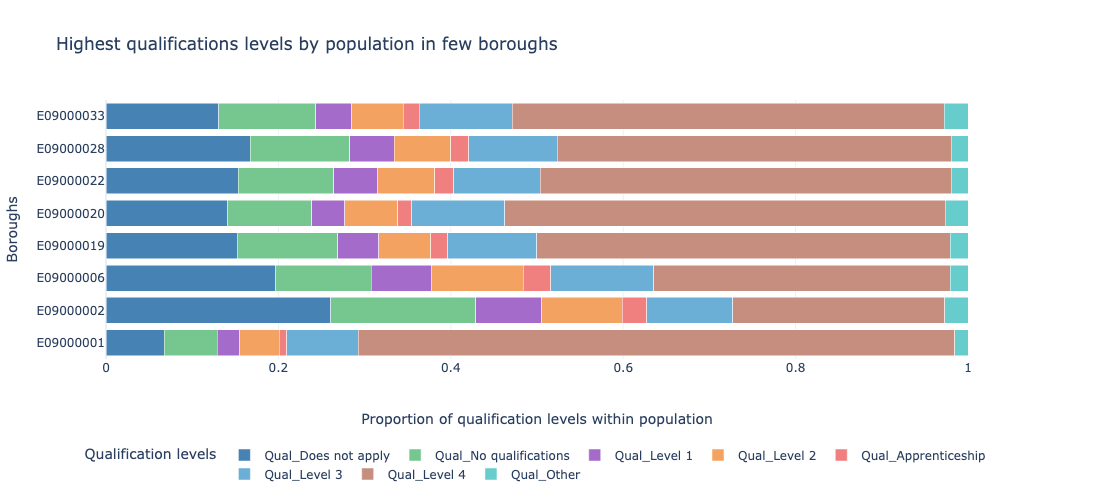

In [76]:
import plotly.express as px

# Define a custom color palette
custom_colors = {
    'Qual_Does not apply': '#4682B4',         # Light Steel Blue (lighter blue)
    'Qual_No qualifications': '#76C68F',      # Light Green (lighter green)
    'Qual_Level 1': '#A56BCB',                # Light Purple (lighter purple)
    'Qual_Level 2': '#F4A261',                # Light Orange (lighter orange)
    'Qual_Apprenticeship': '#F08080',         # Light Coral (lighter red)
    'Qual_Level 3': '#6BAED6',                # Light Sky Blue (lighter light blue)
    'Qual_Level 4': '#C68E7E',                # Light Brown (lighter brown)
    'Qual_Other': '#66CCCC',                  # Light Turquoise (lighter teal)
}

# Create the stacked bar chart
fig = px.bar(
    qual_df,  # Your dataset
    y='Lower tier local authorities Code',
    x='Normalized',
    color='Qualification levels',
    orientation='h',
    title='Highest qualifications levels by population in few boroughs',
    labels={'Lower tier local authorities Code': 'Boroughs', 'Normalized': 'Proportion of qualification levels within population'},
    color_discrete_map=custom_colors  # Use custom color palette
)

# Fix opacity and ensure colors are fully opaque
fig.update_traces(hoverinfo='none', hovertemplate = None)

# Update layout
fig.update_layout(
    yaxis_title='Boroughs',
    xaxis_title='Proportion of qualification levels within population',
    xaxis=dict(range=[0, 1], title_standoff=40),
    barmode='stack',
    height=500,
    width=1100,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.5,
        xanchor='center',
        x=0.5
    ),
    margin=dict(l=100, r=150),
    template='plotly_white'  # Use a neutral template
)

# Show the interactive plot
fig.show()

In [77]:
# Merge
merged_df = tesco_borough.merge(
    edu_subset,
    left_on='area_id',
    right_on='Lower tier local authorities Code',
    how='inner'
).drop(columns=['Lower tier local authorities Code'])
merged_df

area_id      weight      volume       fat      salt      sugar  \
0   E09000001  323.191326   98.939380  8.474571  0.530630   9.278630   
1   E09000002  420.935557  122.496244  9.203494  0.603111  10.797371   
2   E09000003  407.037490  115.072595  8.593410  0.567466   9.531202   
3   E09000004  359.918970  106.527155  9.132688  0.591924  10.945563   
4   E09000005  434.028080  129.064687  8.956840  0.570575  10.148551   
5   E09000006  319.591462  101.264499  9.135686  0.563933  11.221778   
6   E09000007  348.500559  102.608330  8.807310  0.540549   9.425026   
7   E09000008  353.745211  107.575089  9.097703  0.568053  10.970695   
8   E09000009  358.482604  106.277820  9.013596  0.584711   9.598558   
9   E09000010  415.915377  122.480756  8.887061  0.623285   9.945556   
10  E09000011  403.180640  114.839242  8.931937  0.613522   9.764548   
11  E09000012  405.966455  111.666249  8.948248  0.605663   9.695223   
12  E09000013  368.814928  102.945389  8.885799  0.589399   8.907797   
13  E09000014  401.604253  111.462131  9.038715  0.611224   9.368936   
14  E09000015  427.673366  133.287536  8.761249  0.556509  10.050622   
15  E09000016  319.355008   99.926729  9.269006  0.582841  11.465863   
16  E09000017  374.744566  119.993000  8.830876  0.591135  10.155749   
17  E09000018  337.110617  105.283588  9.269753  0.577372  10.391473   
18  E09000019  357.494803  104.623677  8.800134  0.584178   9.431937   
19  E09000020  372.518137  100.605739  8.648010  0.571452   8.639487   
20  E09000021  297.920195   95.222667  9.321776  0.569627  10.990804   
21  E09000022  396.991356  103.549864  8.713462  0.608146   9.298846   
22  E09000023  399.145142  105.680778  8.800982  0.614673   9.764911   
23  E09000024  336.868074  103.900147  8.943247  0.557994  10.252746   
24  E09000025  450.064675  136.901902  9.352836  0.566097  10.621144   
25  E09000026  407.113435  119.101882  9.312423  0.597600  10.372852   
26  E09000027  321.973354   97.485293  9.166019  0.550453   9.729258   
27  E09000028  387.626713  107.220704  8.636265  0.612132   9.235558   
28  E09000029  295.701464   98.589146  9.368410  0.552194  11.622393   
29  E09000030  389.718840  112.744033  8.997660  0.584486  10.220893   
30  E09000031  414.648564  118.083914  9.070721  0.613686   9.794221   
31  E09000032  350.417094  103.778415  8.816138  0.573012   9.530123   
32  E09000033  380.364908  107.985478  8.729164  0.536867   9.439403   

     protein       carb     fibre   alcohol  ...  area_sq_km  \
0   5.253351  15.782114  1.619776  0.340935  ...        2.90   
1   5.194330  19.787194  1.590185  0.200895  ...       36.09   
2   5.130868  17.029493  1.638750  0.227329  ...       86.76   
3   5.305717  20.002364  1.656811  0.203091  ...       60.58   
4   5.133530  18.727393  1.586266  0.206114  ...       43.28   
5   5.226345  19.178726  1.629287  0.274866  ...      150.14   
6   5.234019  16.308132  1.632956  0.275719  ...       21.87   
7   5.175600  19.020430  1.599952  0.225065  ...       86.57   
8   5.368264  17.210725  1.651383  0.234744  ...       55.55   
9   5.481633  18.569678  1.566205  0.224825  ...       80.84   
10  5.361007  18.370701  1.578224  0.244143  ...       47.39   
11  5.274315  17.754509  1.569258  0.228639  ...       19.08   
12  5.508946  16.075068  1.630174  0.255039  ...       16.40   
13  5.415680  17.467751  1.612470  0.244741  ...       29.60   
14  5.009544  18.351836  1.618875  0.205678  ...       50.42   
15  5.375069  20.266348  1.681572  0.203997  ...      112.44   
16  5.312669  18.095953  1.597971  0.265520  ...      115.71   
17  5.281791  18.075852  1.684340  0.235430  ...       55.95   
18  5.428998  16.864155  1.607839  0.283798  ...       14.90   
19  5.393425  15.725488  1.609724  0.282443  ...       12.11   
20  5.357825  18.783513  1.743548  0.239107  ...       37.26   
21  5.437019  17.201679  1.589005  0.255795  ...       26.82   
22  5.366399  18.059441  1.577204  0.244804  ...       35.17   
23  5.233640  17.5046

In [78]:
# Normalize to percentages
merged_df['Total_Pop'] = merged_df['population']
for col in [f'Qual_{qual_mapping[code]}' for code in school_age_codes]:
    merged_df[f'{col}_pct'] = merged_df[col] / merged_df['Total_Pop'] * 100

print("Merged Data Preview (2015 Tesco + Mapped Quals):")
merged_df

Merged Data Preview (2015 Tesco + Mapped Quals):


area_id      weight      volume       fat      salt      sugar  \
0   E09000001  323.191326   98.939380  8.474571  0.530630   9.278630   
1   E09000002  420.935557  122.496244  9.203494  0.603111  10.797371   
2   E09000003  407.037490  115.072595  8.593410  0.567466   9.531202   
3   E09000004  359.918970  106.527155  9.132688  0.591924  10.945563   
4   E09000005  434.028080  129.064687  8.956840  0.570575  10.148551   
5   E09000006  319.591462  101.264499  9.135686  0.563933  11.221778   
6   E09000007  348.500559  102.608330  8.807310  0.540549   9.425026   
7   E09000008  353.745211  107.575089  9.097703  0.568053  10.970695   
8   E09000009  358.482604  106.277820  9.013596  0.584711   9.598558   
9   E09000010  415.915377  122.480756  8.887061  0.623285   9.945556   
10  E09000011  403.180640  114.839242  8.931937  0.613522   9.764548   
11  E09000012  405.966455  111.666249  8.948248  0.605663   9.695223   
12  E09000013  368.814928  102.945389  8.885799  0.589399   8.907797   
13  E09000014  401.604253  111.462131  9.038715  0.611224   9.368936   
14  E09000015  427.673366  133.287536  8.761249  0.556509  10.050622   
15  E09000016  319.355008   99.926729  9.269006  0.582841  11.465863   
16  E09000017  374.744566  119.993000  8.830876  0.591135  10.155749   
17  E09000018  337.110617  105.283588  9.269753  0.577372  10.391473   
18  E09000019  357.494803  104.623677  8.800134  0.584178   9.431937   
19  E09000020  372.518137  100.605739  8.648010  0.571452   8.639487   
20  E09000021  297.920195   95.222667  9.321776  0.569627  10.990804   
21  E09000022  396.991356  103.549864  8.713462  0.608146   9.298846   
22  E09000023  399.145142  105.680778  8.800982  0.614673   9.764911   
23  E09000024  336.868074  103.900147  8.943247  0.557994  10.252746   
24  E09000025  450.064675  136.901902  9.352836  0.566097  10.621144   
25  E09000026  407.113435  119.101882  9.312423  0.597600  10.372852   
26  E09000027  321.973354   97.485293  9.166019  0.550453   9.729258   
27  E09000028  387.626713  107.220704  8.636265  0.612132   9.235558   
28  E09000029  295.701464   98.589146  9.368410  0.552194  11.622393   
29  E09000030  389.718840  112.744033  8.997660  0.584486  10.220893   
30  E09000031  414.648564  118.083914  9.070721  0.613686   9.794221   
31  E09000032  350.417094  103.778415  8.816138  0.573012   9.530123   
32  E09000033  380.364908  107.985478  8.729164  0.536867   9.439403   

     protein       carb     fibre   alcohol  ...  Qual_Other  Total_Pop  \
0   5.253351  15.782114  1.619776  0.340935  ...         134     6687.0   
1   5.194330  19.787194  1.590185  0.200895  ...        5961   203101.0   
2   5.130868  17.029493  1.638750  0.227329  ...        9789   378778.0   
3   5.305717  20.002364  1.656811  0.203091  ...        5723   242387.0   
4   5.133530  18.727393  1.586266  0.206114  ...       11064   323443.0   
5   5.226345  19.178726  1.629287  0.274866  ...        6731   325303.0   
6   5.234019  16.308132  1.632956  0.275719  ...        4700   243837.0   
7   5.175600  19.020430  1.599952  0.225065  ...        9247   380070.0   
8   5.368264  17.210725  1.651383  0.234744  ...       12250   344285.0   
9   5.481633  18.569678  1.566205  0.224825  ...        8311   328738.0   
10  5.361007  18.370701  1.578224  0.244143  ...        6316   274542.0   
11  5.274315  17.754509  1.569258  0.228639  ...        5361   268626.0   
12  5.508946  16.075068  1.630174  0.255039  ...        4273   182183.0   
13  5.415680  17.467751  1.612470  0.244741  ...        6644   268251.0   
14  5.009544  18.351836  1.618875  0.205678  ...        6762   246818.0   
15  5.375069  20.266348  1.681572  0.203997  ...        6277   249375.0   
16  5.312669  18.095953  1.597971  0.265520  ...        8790   296056.0   
17  5.281791  18.075852  1.684340  0.235430  ...        9776   266412.0   
18  5.428998  16.864155  1.607839  0.283798  ...        4424   227507.0   
19  5.393425  15.725488  1.609724  0.282443  ...        3

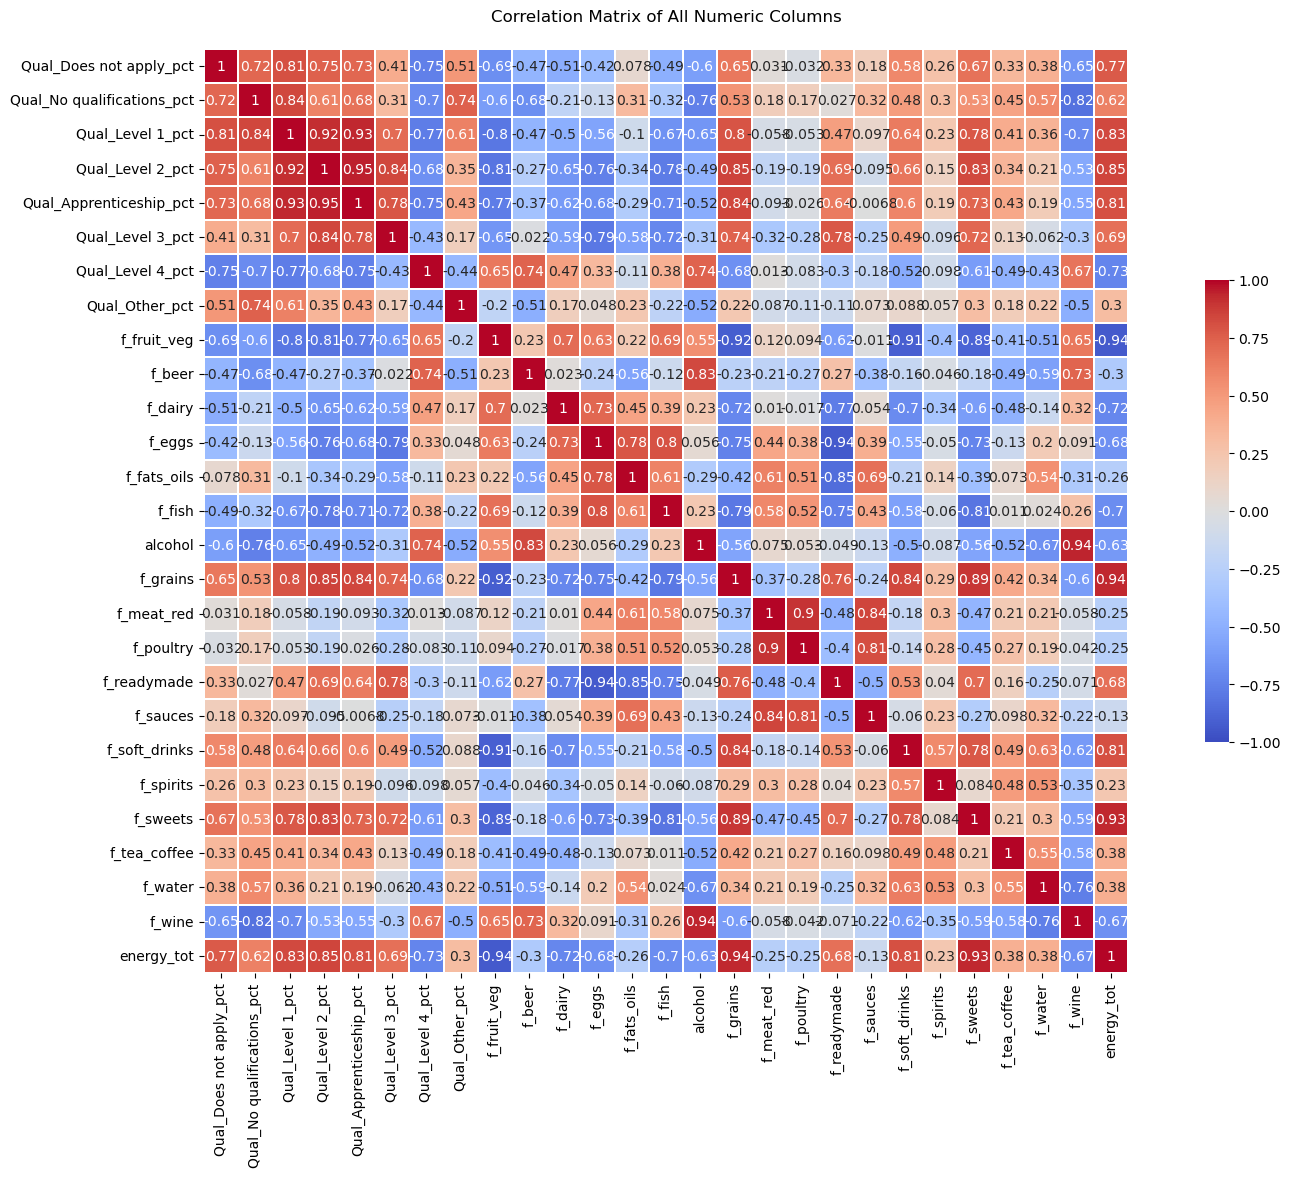

In [79]:
#analysis

# Correlation analysis
correlations = merged_df[[
    'Qual_Does not apply_pct', 'Qual_No qualifications_pct', 'Qual_Level 1_pct',
    'Qual_Level 2_pct', 'Qual_Apprenticeship_pct', 'Qual_Level 3_pct',
    'Qual_Level 4_pct', 'Qual_Other_pct','f_fruit_veg',
    'f_beer', 'f_dairy', 'f_eggs', 'f_fats_oils', 'f_fish', 'alcohol',
    'f_grains', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces', 'f_soft_drinks', 
    'f_spirits', 'f_sweets', 'f_tea_coffee', 'f_water', 'f_wine','energy_tot'
]].corr()

import seaborn as sns


# Heatmap with improved spacing
plt.figure(figsize=(20, 12))  # Larger figure size
sns.heatmap(
    correlations, 
    annot=True,                # Show correlation values
    cmap='coolwarm',           # Color scheme
    vmin=-1, vmax=1, center=0, # Color scale
    annot_kws={'size': 10},    # Smaller font size for annotations
    linewidths=0.1,            # Space between cells
    square=True,               # Square cells
    cbar_kws={'shrink': .5}    # Adjust colorbar size
)
plt.title('Correlation Matrix of All Numeric Columns', pad=20)  # Add padding to title
plt.show()

Negative correlation between 'Percent of People with No Qualification' and 'Wine' = -0.82

Negative correlations between 'Fruits and Vegetables' and 'Percent of People with Level 1 and Level 2 Qualifications' = -0.8, -0.81

Positive correlations between 'Grains' and 'Percent of People with Level 1, Level 2, Appenticeship Qualifications' = 0.8, 0.85, 0.84

Positive correlation between 'Sweets' and 'Percent of People with Level 2 Qualification' = 0.83

Strong positive correlation between 'Total energy' and 'Percent of People with Level 1 and Level 2 Qualifications' = 0.83, 0.85